In [6]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)
from plotting_utils import *
import uproot
import awkward as ak

In [7]:
input_folder = "/work/dvalsecc/Clustering/dataset/genmatching_efficiency_studies/electrons_genmatching/"
output_folder = "plots/electrons_gen_matching_stdMCRun2/patElectron_mustache/"
os.makedirs(output_folder, exist_ok=True)

In [8]:
df = pd.HDFStore(f"{input_folder}/Mustache_run3std_v1.h5py", "r")["df"]
df.rename(columns={"output_object.csv":"genpart_index"}, inplace=True)
df = df.iloc[:-1]

# GenParticles

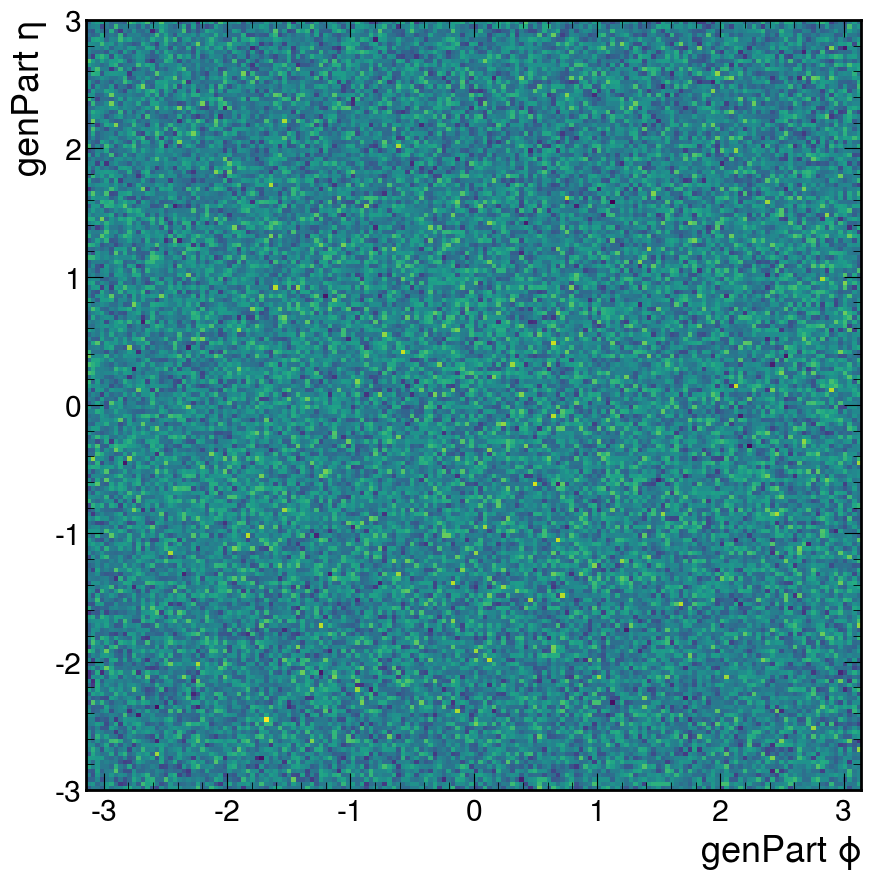

In [9]:
plt.hist2d(df.genpart_phi,df.genpart_eta,  bins=(170, 180), range=((-np.pi,np.pi),(-3,3)));
plt.xlabel("genPart $\phi$")
plt.ylabel("genPart $\eta$")
plt.savefig(f"{output_folder}/genpart_etaphi.png")

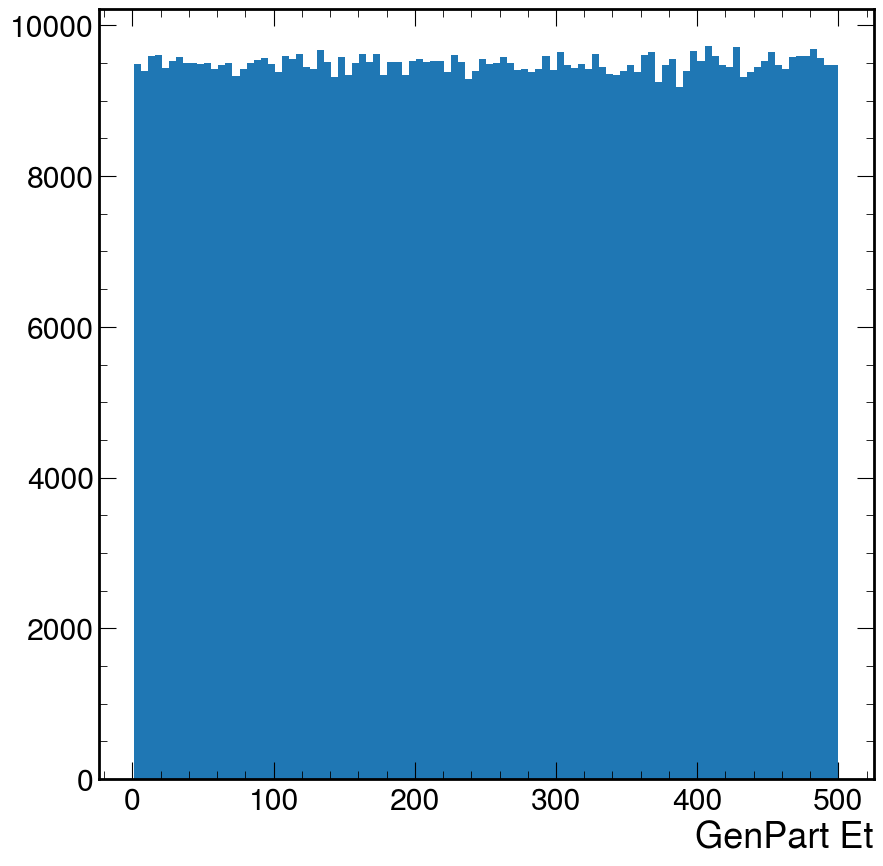

In [10]:
plt.hist(df.genpart_et, bins=100);
plt.xlabel("GenPart Et")
plt.savefig(f"{output_folder}/genpart_et.png")

# SuperClusters

Taking the SC closest to the genparticle (dR < 0.2)

In [11]:
dfsc = df[df.sc_matched==1]

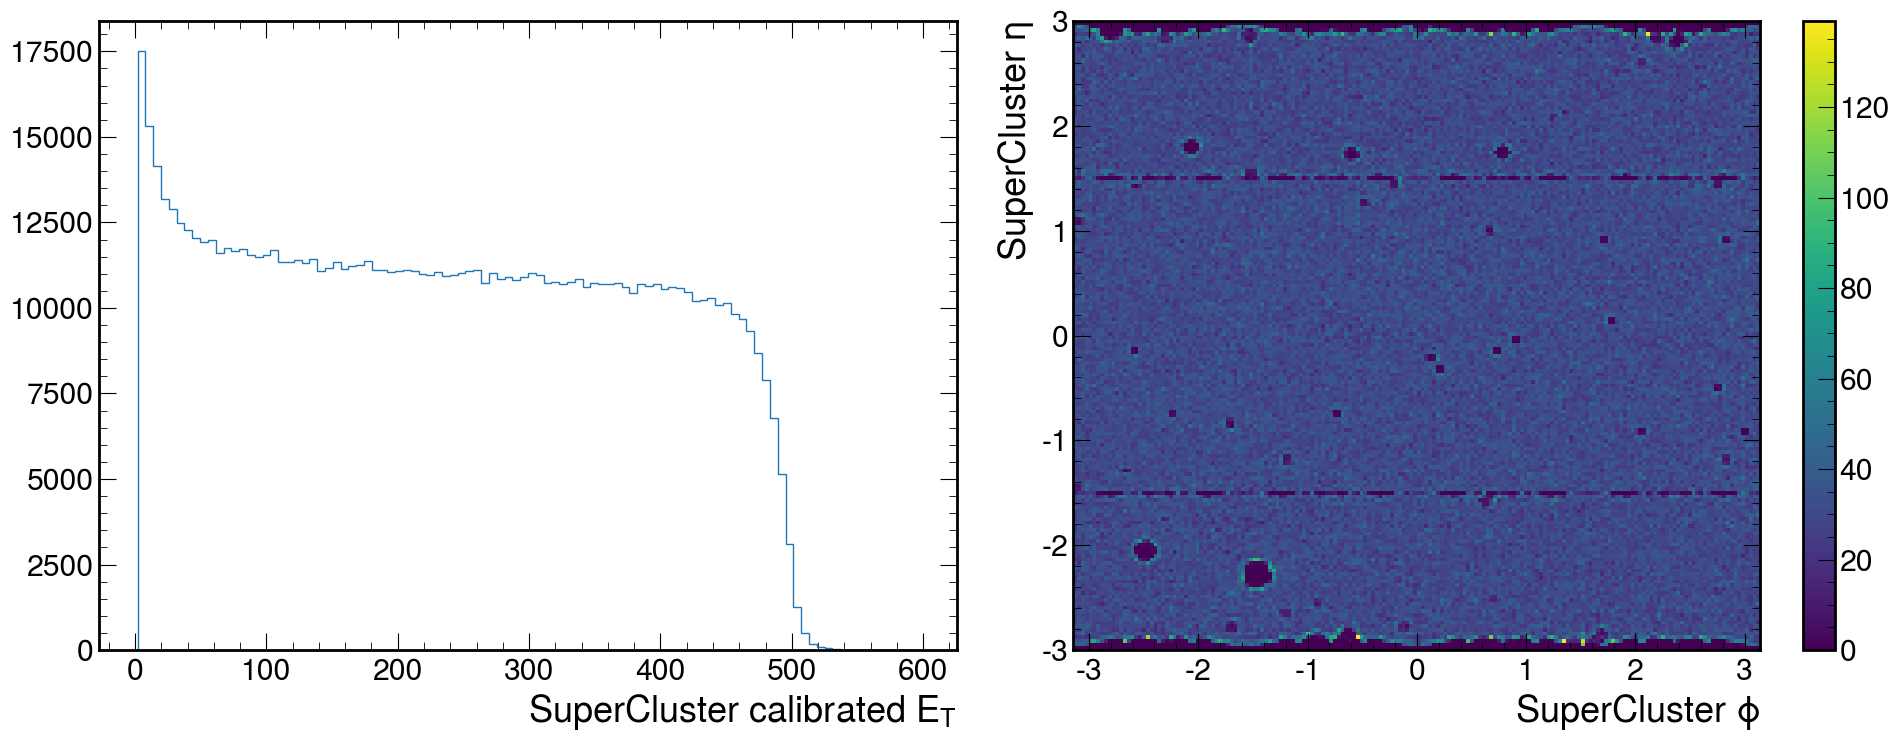

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(dfsc.et_sc_raw, bins=100, histtype="step")
ax1.set_xlabel("SuperCluster calibrated $E_T$")
*b, C = ax2.hist2d(dfsc.sc_phi, dfsc.sc_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("SuperCluster $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax2)
plt.tight_layout()
plt.savefig(f"{output_folder}/superclusters.png")

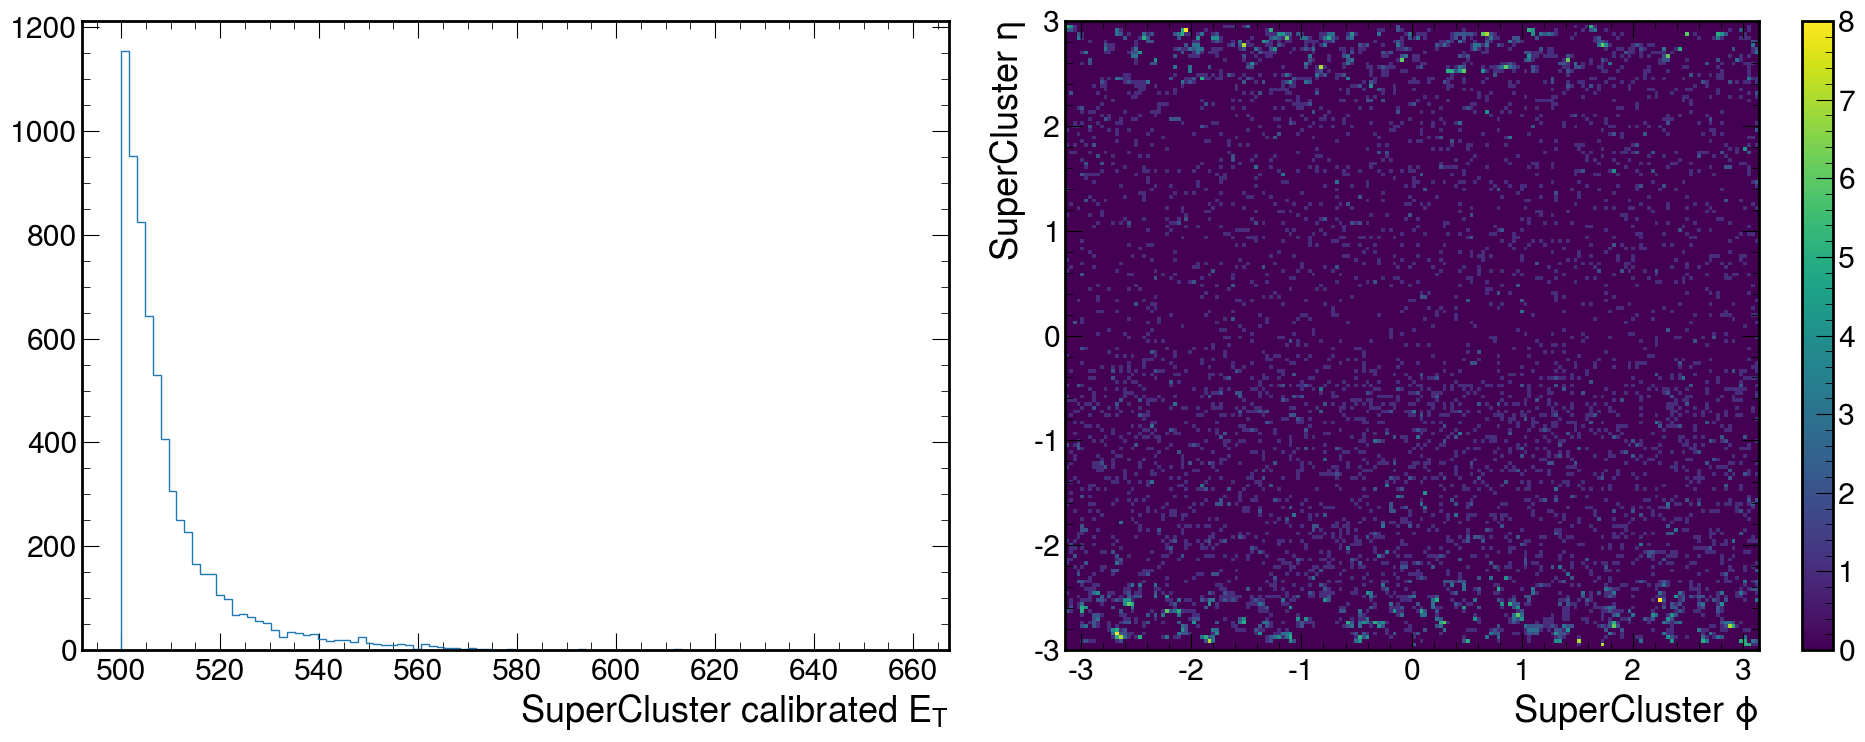

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
mask = dfsc.et_sc_calib>500
ax1.hist(dfsc[mask].et_sc_calib, bins=100, histtype="step")
ax1.set_xlabel("SuperCluster calibrated $E_T$")
*b, C = ax2.hist2d(dfsc[mask].sc_phi, dfsc[mask].sc_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("SuperCluster $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax2)
plt.tight_layout()
plt.savefig(f"{output_folder}/superclusters.png")

# PatElectrons

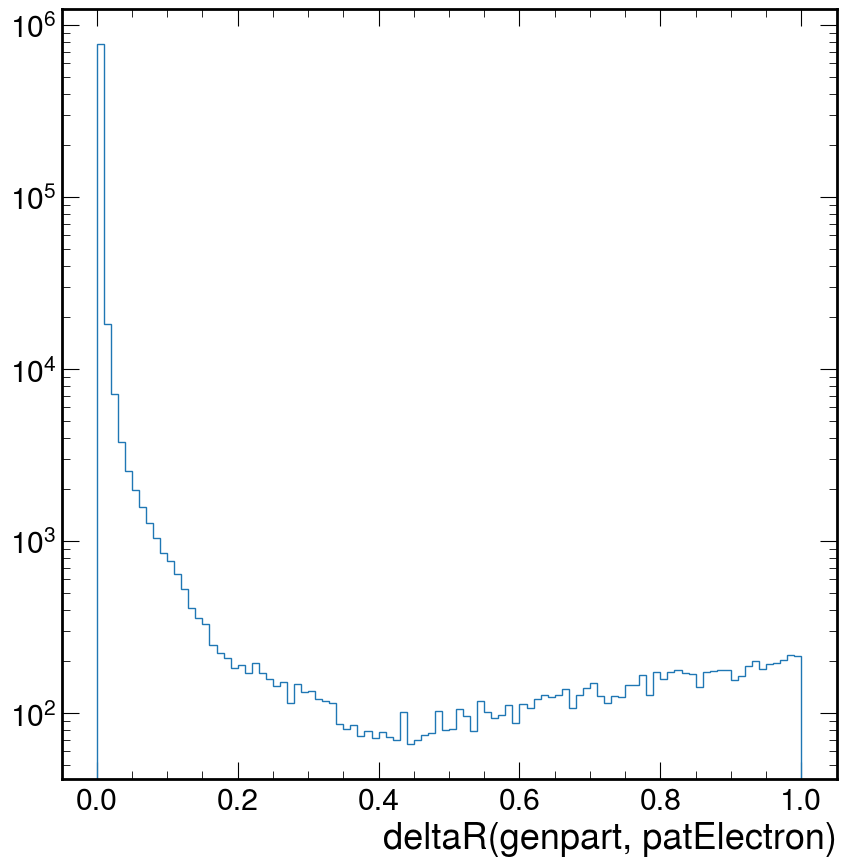

In [14]:
plt.hist(df.deltaR_genPart_ele, bins=100, range=(0,1), label="Mustache", histtype="step")
plt.xlabel("deltaR(genpart, patElectron)");
plt.yscale("log")

Applying 0.2 deltaR cut between genParticle and ele

In [15]:
dfele = df[df.deltaR_genPart_ele<0.2]

Text(1, 0, 'patEle $E_T$ / genParticle $E_T$')

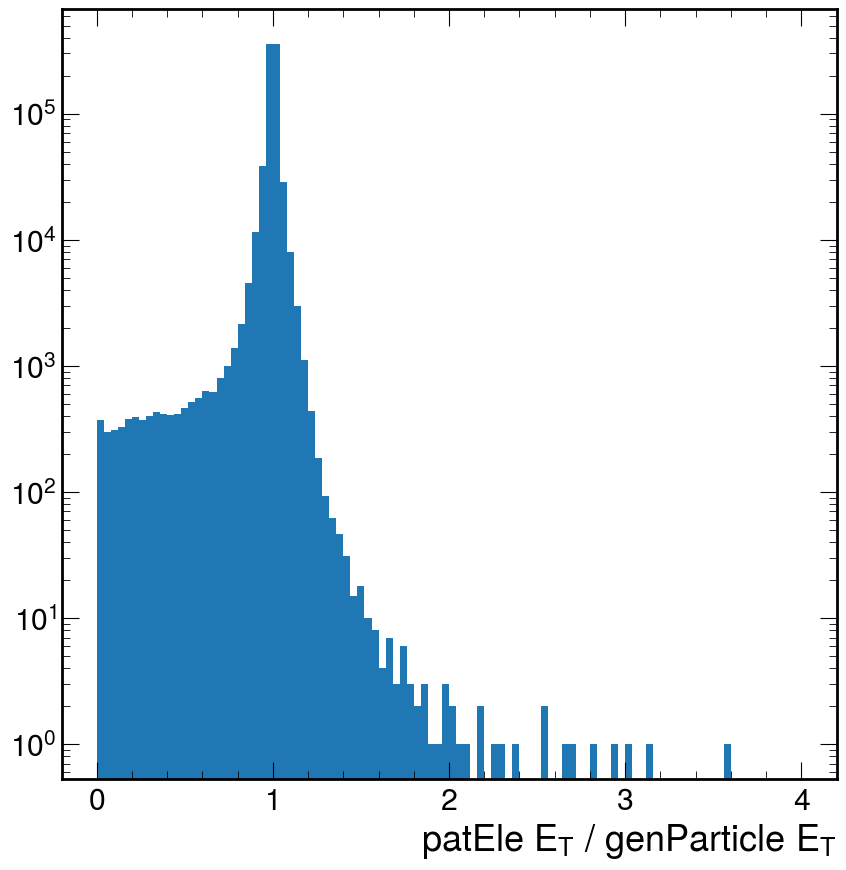

In [16]:
plt.hist(dfele.ele_et/ dfele.genpart_et, bins=100, range=(0, 4))
plt.yscale("log")
plt.xlabel("patEle $E_T$ / genParticle $E_T$")

## Eta-phi distribution

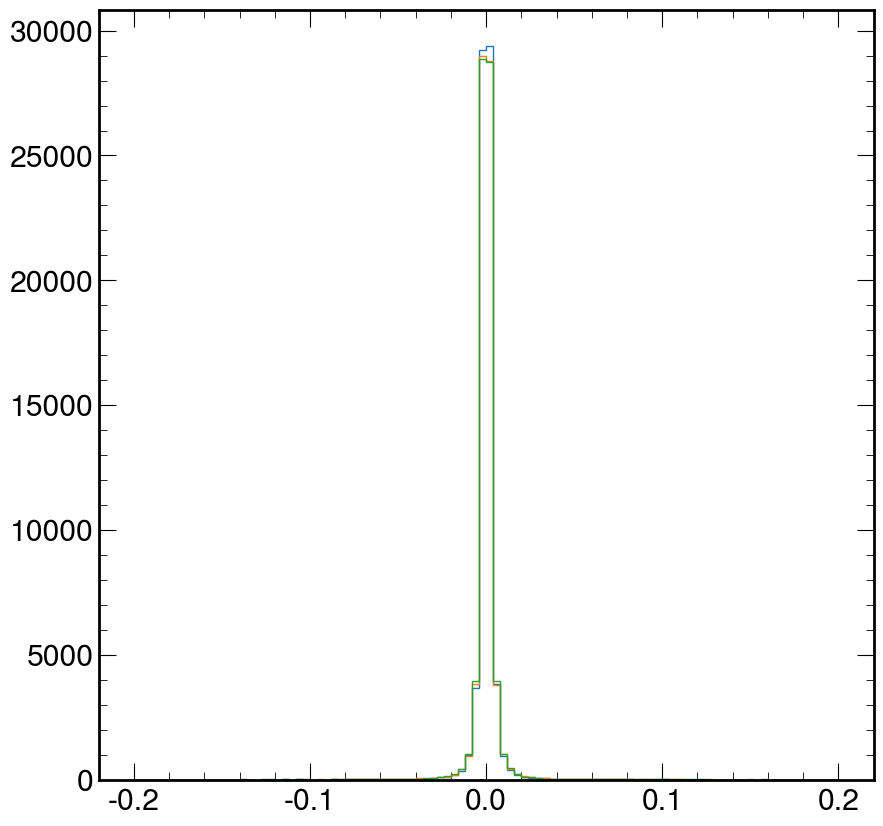

In [17]:
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-1.)&(dfele.ele_phi<0)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>0.5)&(dfele.ele_phi<1.5)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-2.5)&(dfele.ele_phi<-1.5)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");


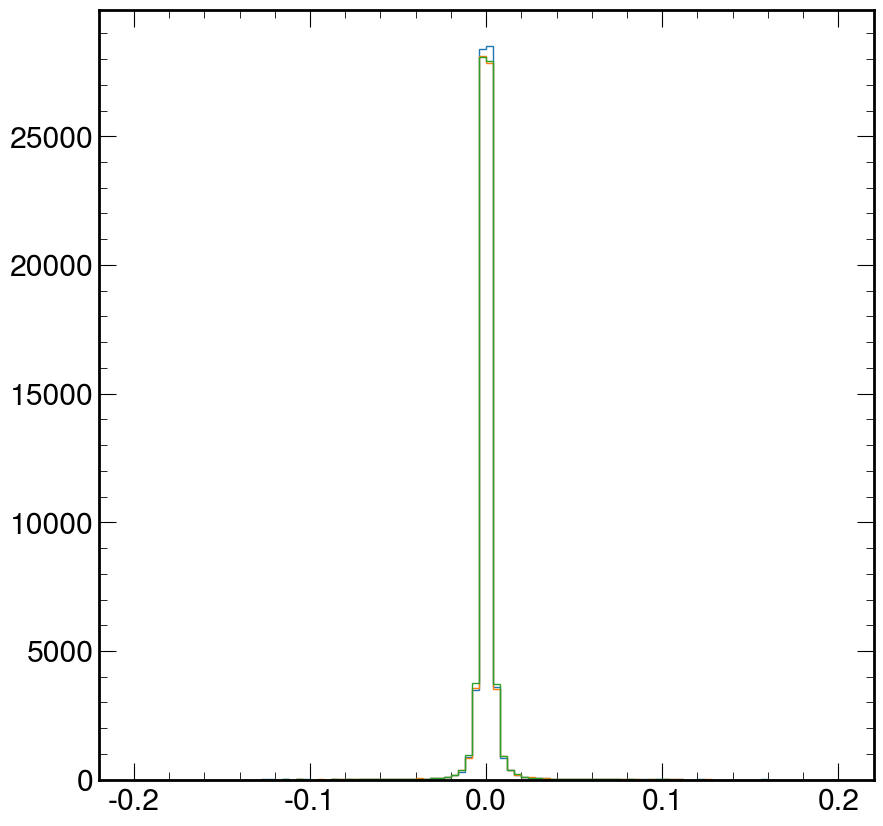

In [18]:
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-1.)&(dfele.ele_phi<0)&(dfele.ele_isEcalDriven==1)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>0.5)&(dfele.ele_phi<1.5)&(dfele.ele_isEcalDriven==1)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-2.5)&(dfele.ele_phi<-1.5)&(dfele.ele_isEcalDriven==1)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");


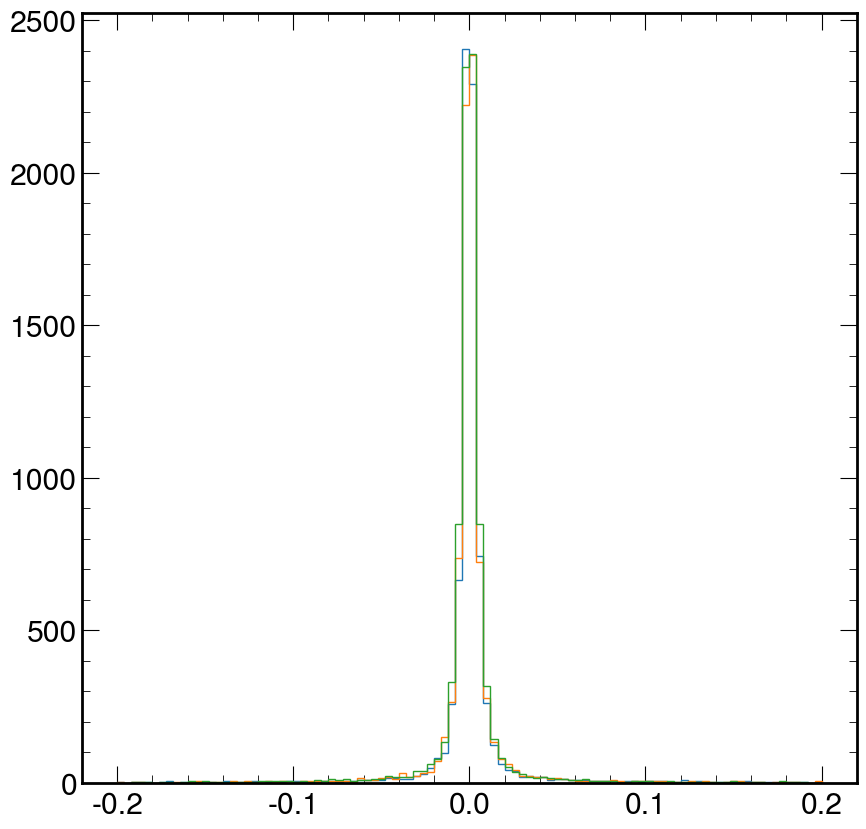

In [19]:
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-1.)&(dfele.ele_phi<0)&(dfele.ele_isEcalDriven==1)&(dfele.ele_isTrackerDriven==0)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>0.5)&(dfele.ele_phi<1.5)&(dfele.ele_isEcalDriven==1)&(dfele.ele_isTrackerDriven==0)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-2.5)&(dfele.ele_phi<-1.5)&(dfele.ele_isEcalDriven==1)&(dfele.ele_isTrackerDriven==0)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");


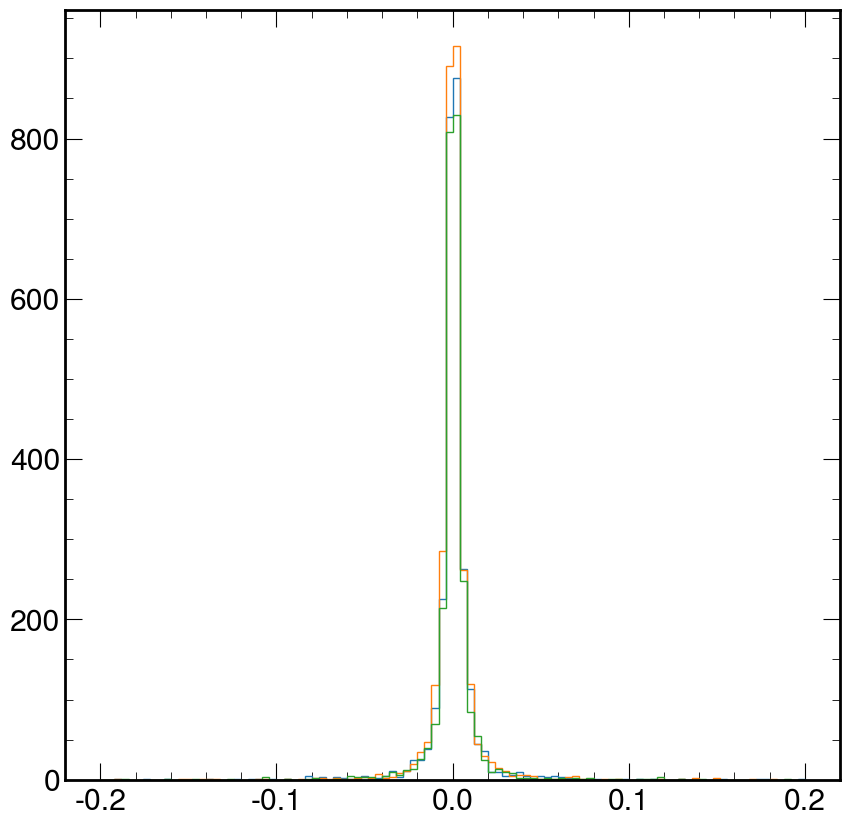

In [20]:
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-1.)&(dfele.ele_phi<0)&(dfele.ele_isEcalDriven==0)&(dfele.ele_isTrackerDriven==1)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>0.5)&(dfele.ele_phi<1.5)&(dfele.ele_isEcalDriven==0)&(dfele.ele_isTrackerDriven==1)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-2.5)&(dfele.ele_phi<-1.5)&(dfele.ele_isEcalDriven==0)&(dfele.ele_isTrackerDriven==1)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");


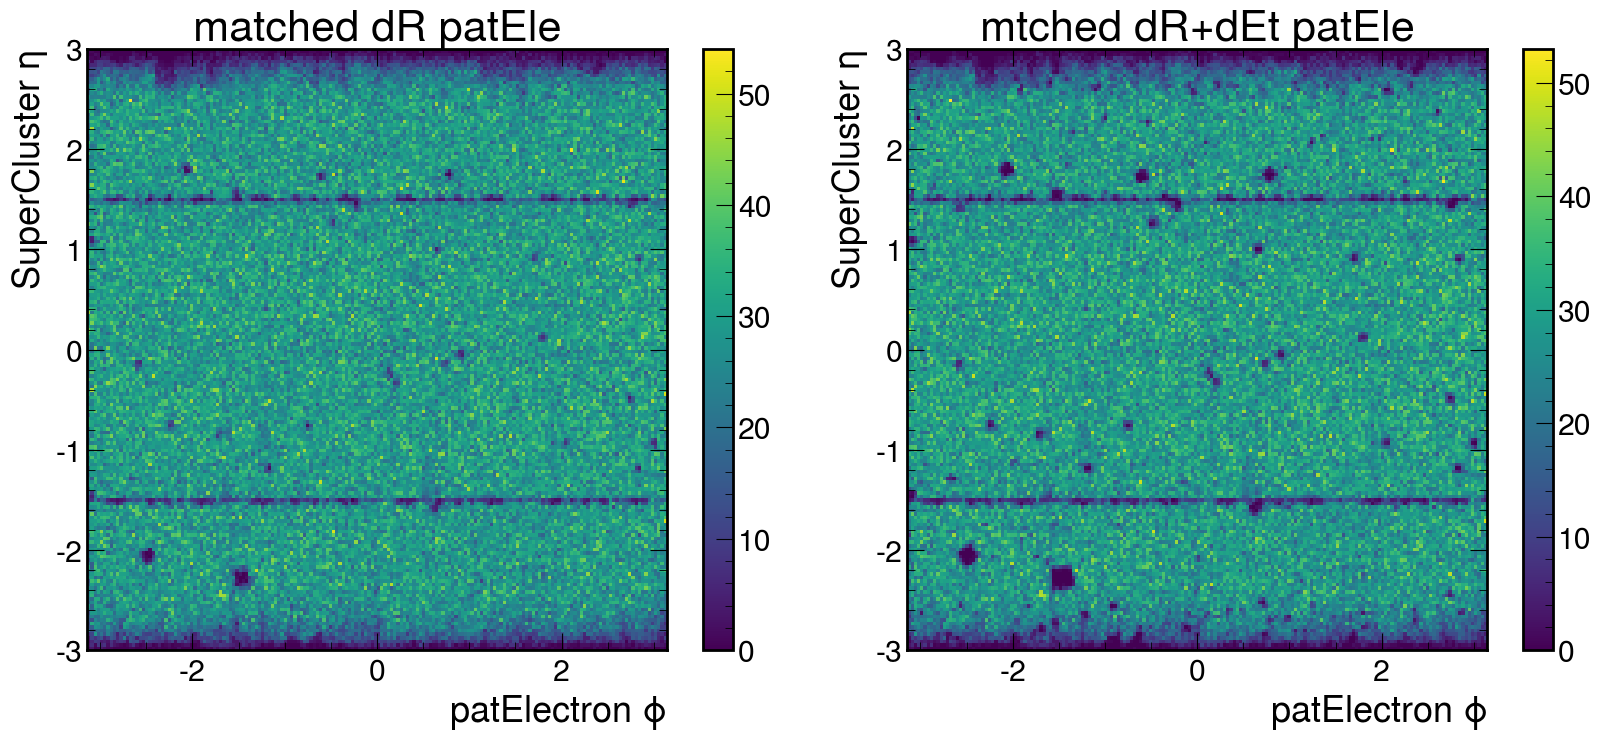

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

*b, C = ax1.hist2d(dfele.ele_phi, dfele.ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("matched dR patEle")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist2d(dfele[etmask].ele_phi, dfele[etmask].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
ax2.set_title("mtched dR+dEt patEle")

plt.colorbar(C, ax=ax2)
plt.tight_layout()
fig.savefig(f"{output_folder}/patEle_inclusive.png")

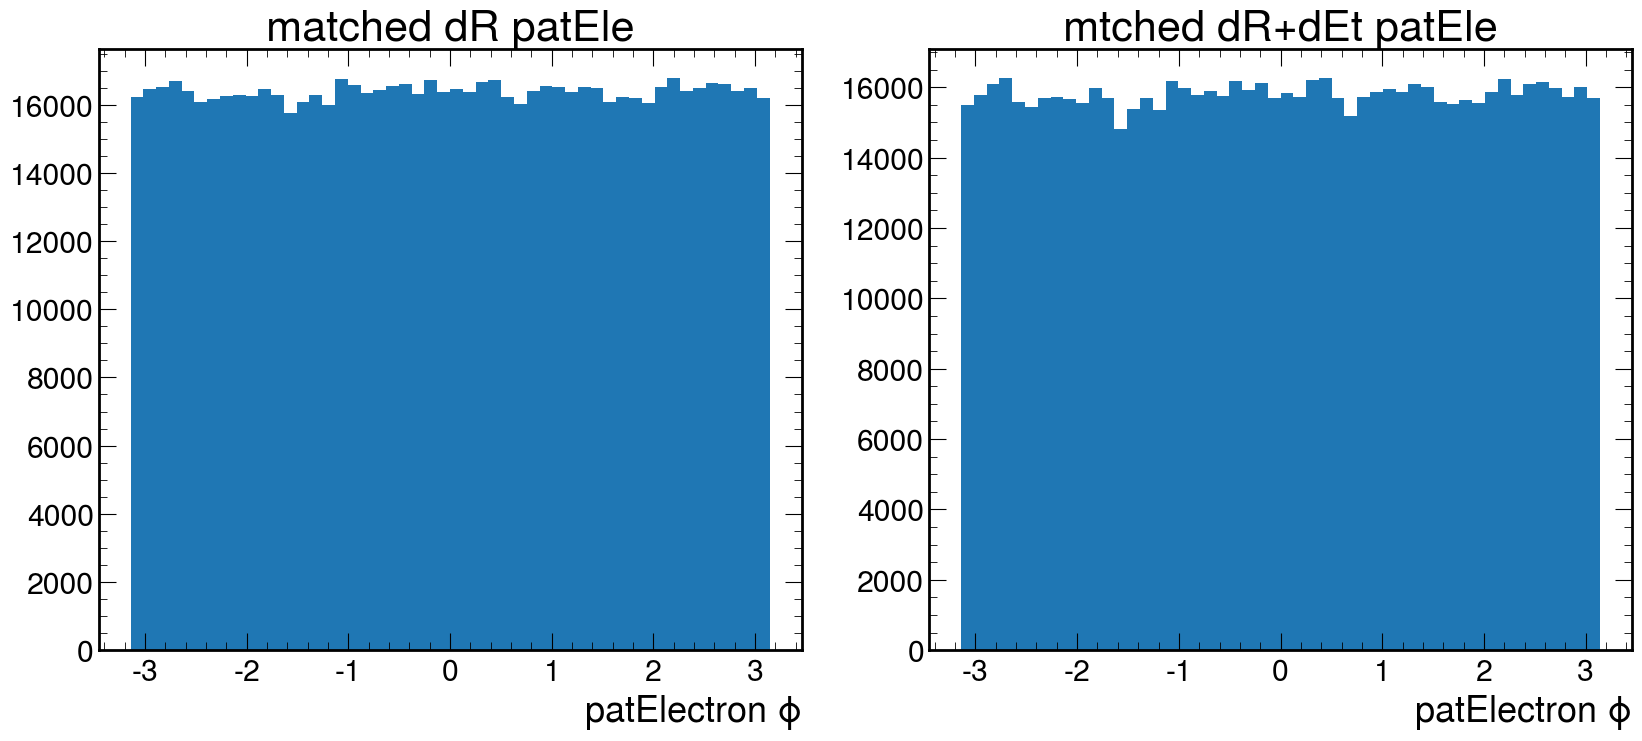

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

*b, C = ax1.hist(dfele.ele_phi,  bins=50, range=(-np.pi, np.pi))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_title("matched dR patEle")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist(dfele[etmask].ele_phi, bins=50, range=(-np.pi, np.pi))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_title("mtched dR+dEt patEle")

plt.tight_layout()
fig.savefig(f"{output_folder}/patEle_phi_inclusive.png")

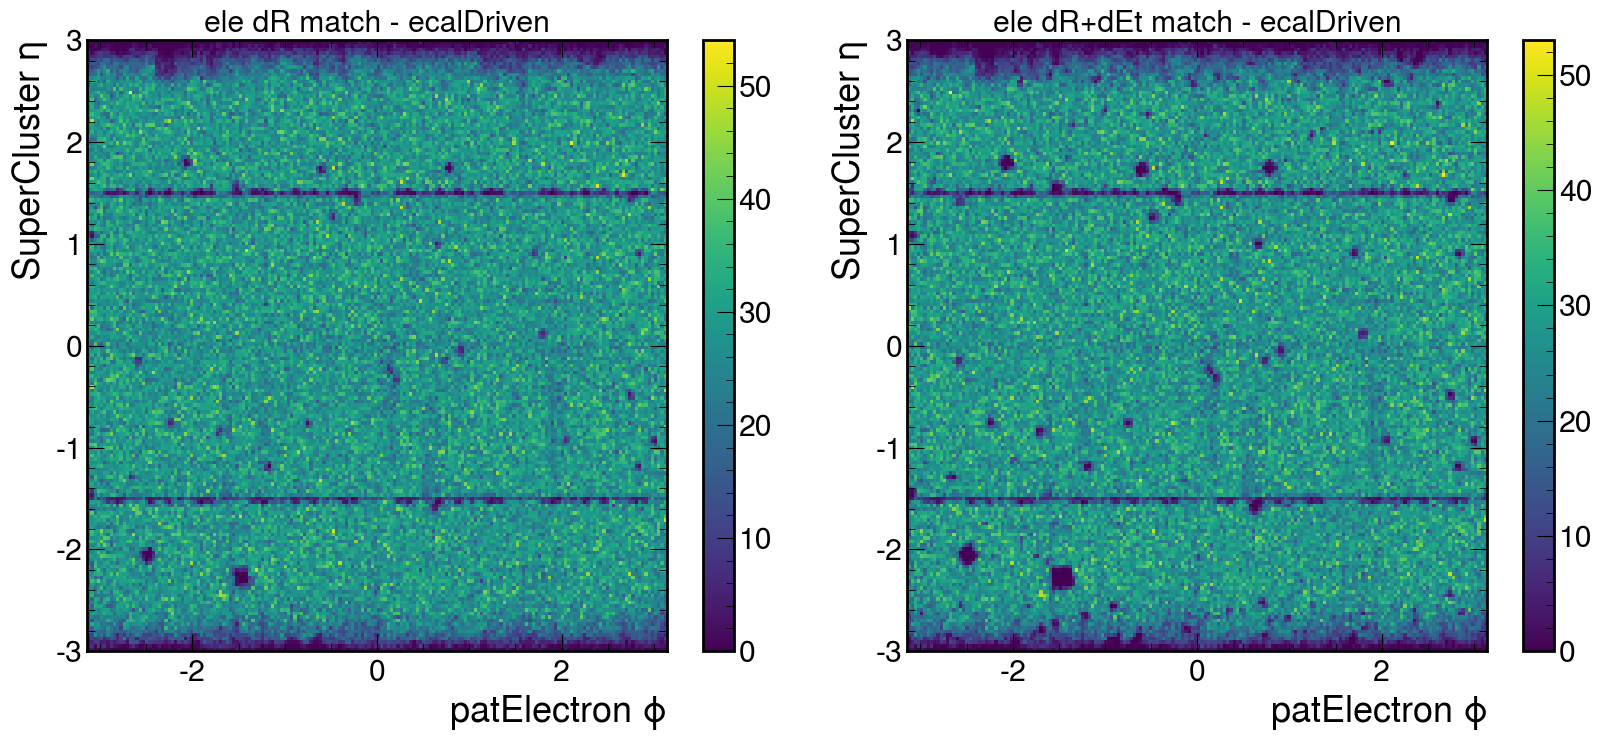

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

ecalDriven = dfele.ele_isEcalDriven==1

*b, C = ax1.hist2d(dfele[ecalDriven].ele_phi, dfele[ecalDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("ele dR match - ecalDriven", fontsize="small")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist2d(dfele[etmask&ecalDriven].ele_phi, dfele[etmask&ecalDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
ax2.set_title("ele dR+dEt match - ecalDriven", fontsize="small")

plt.colorbar(C, ax=ax2)
plt.tight_layout()
fig.savefig(f"{output_folder}/patEle_ecalDriven.png")

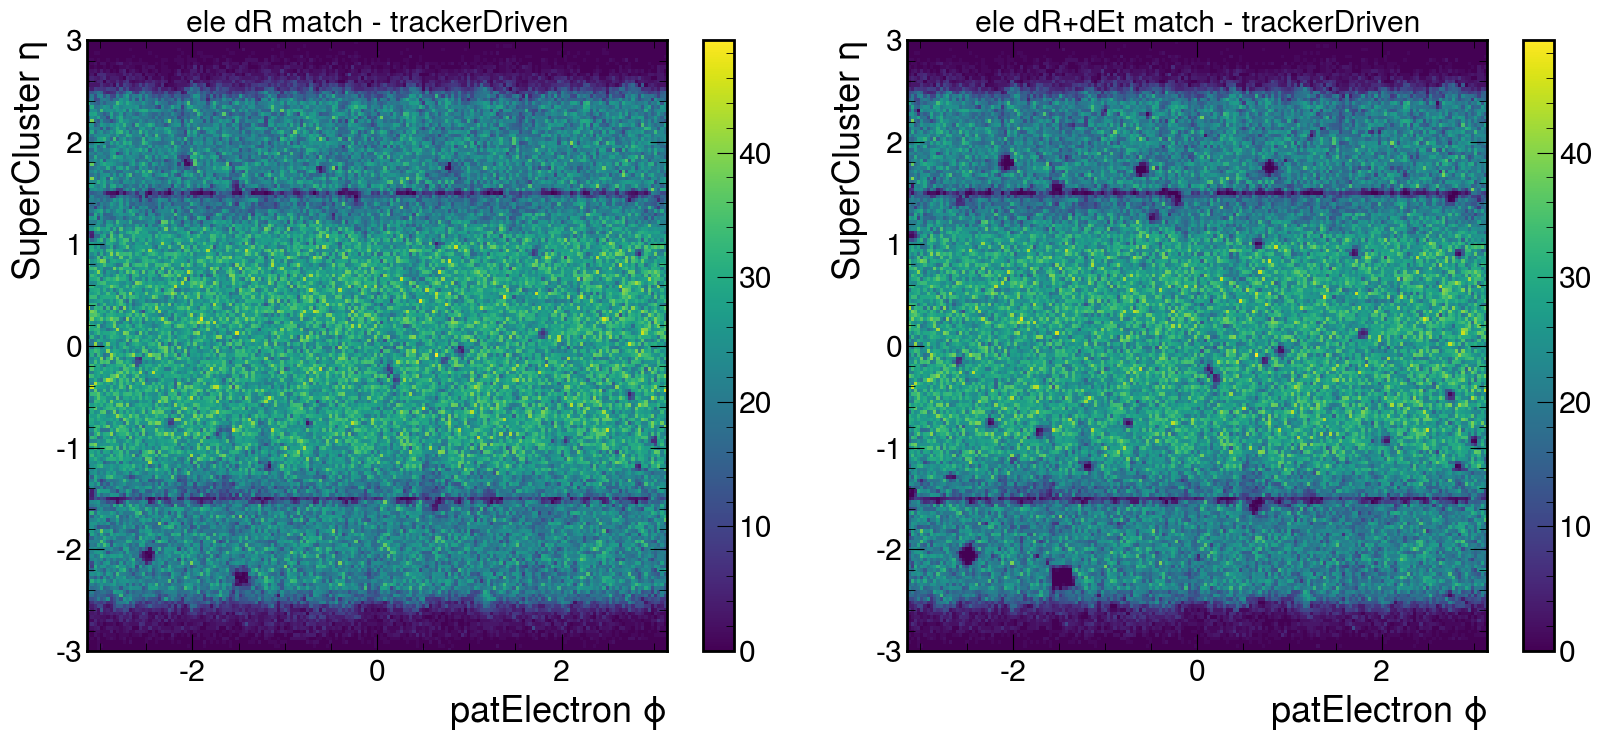

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

trackerDriven = dfele.ele_isTrackerDriven==1

*b, C = ax1.hist2d(dfele[trackerDriven].ele_phi, dfele[trackerDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("ele dR match - trackerDriven", fontsize="small")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist2d(dfele[etmask&trackerDriven].ele_phi, dfele[etmask&trackerDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
ax2.set_title("ele dR+dEt match - trackerDriven", fontsize="small")

plt.colorbar(C, ax=ax2)
plt.tight_layout()
fig.savefig(f"{output_folder}/patEle_trackerDriven.png")

# Electron seeding type

Applying dR and 10% deltaEt matching

In [26]:
etmask = ((df.ele_et/ df.genpart_et)> 0.9)&((df.ele_et/ df.genpart_et)< 1.1)
dRmask = df.deltaR_genPart_ele<0.2
dfm = df[etmask&dRmask]

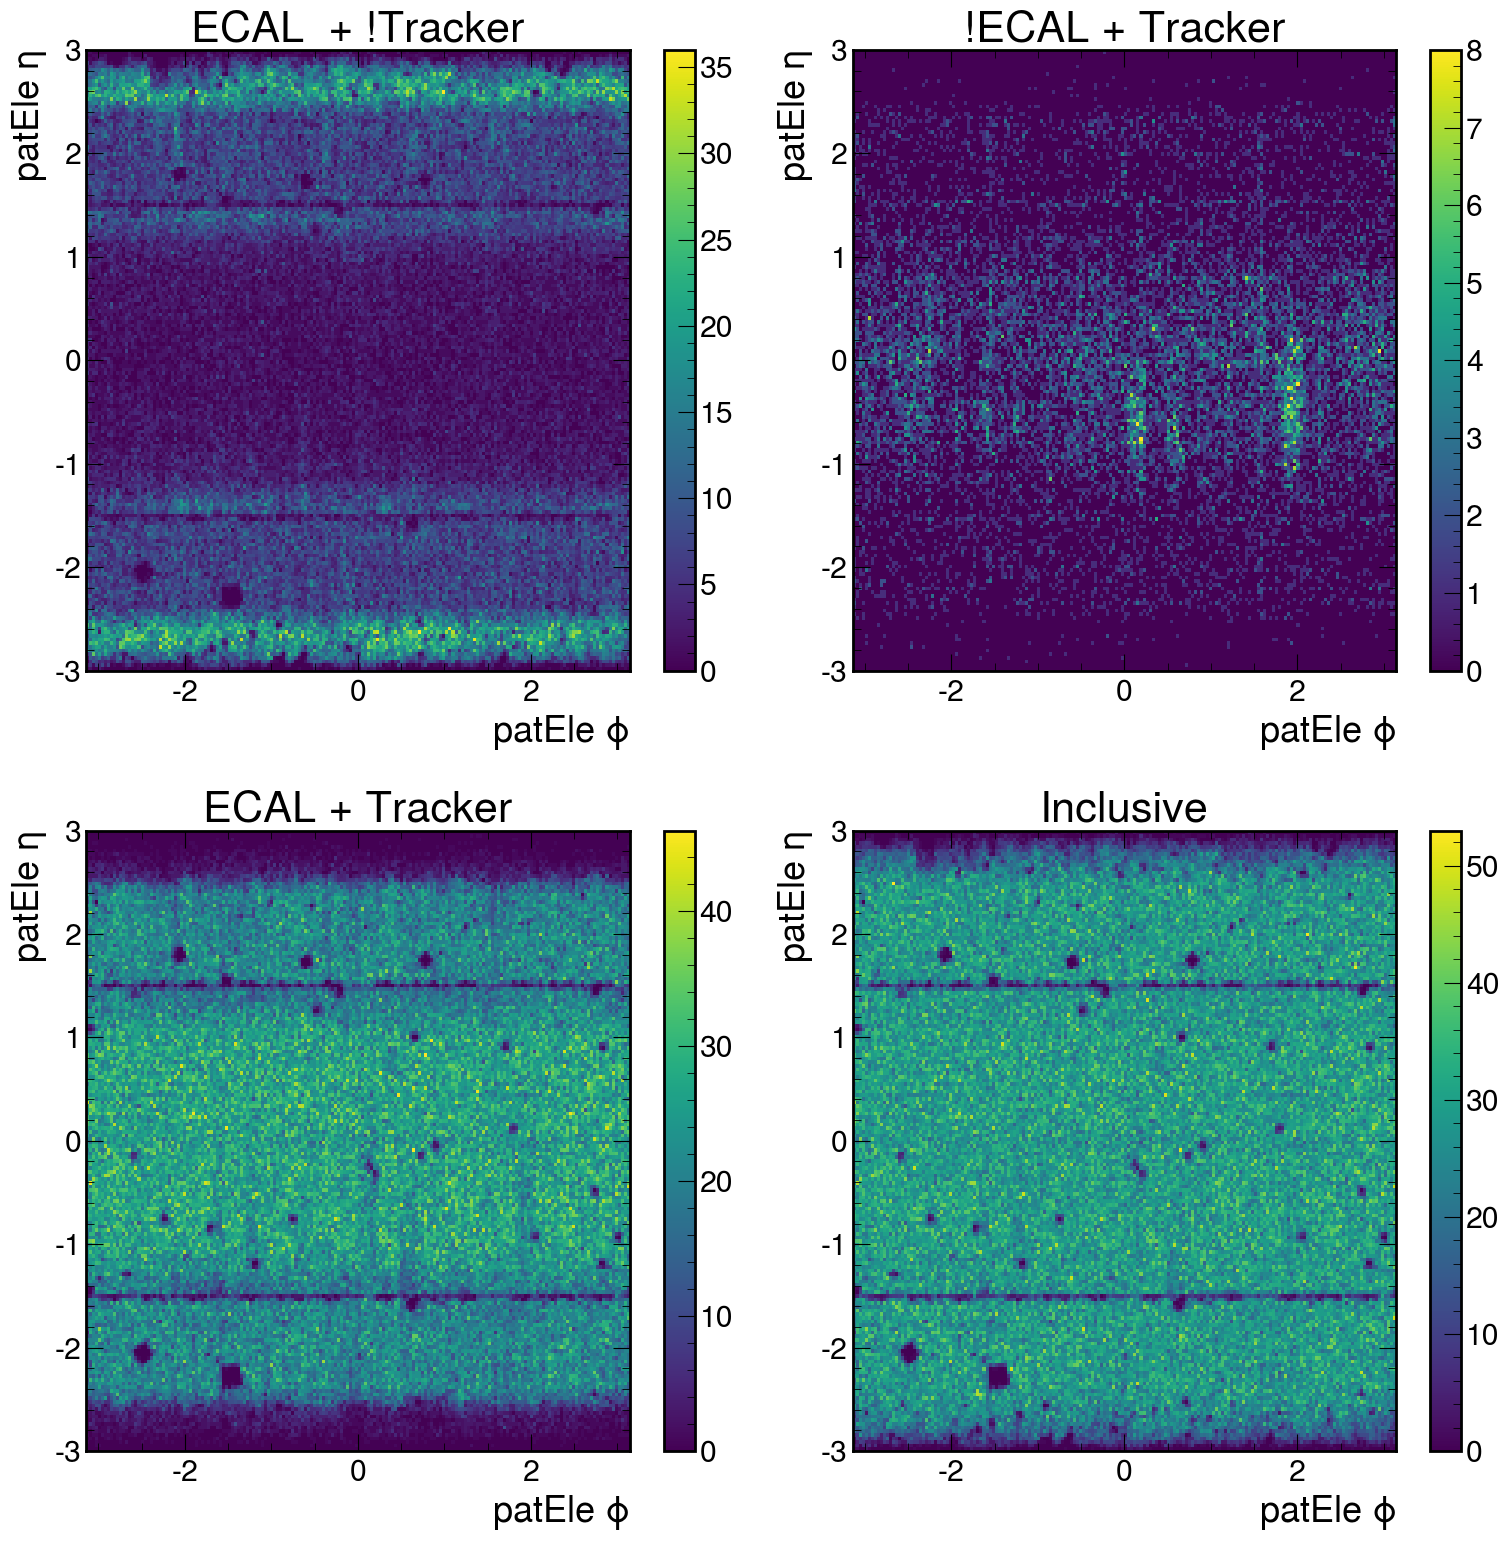

In [27]:
bins = (180, 170)
rrange = ((-np.pi, np.pi),(-3,3))

ecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

noecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

ecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

noecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

N_tot, xbins, ybins = np.histogram2d(dfm["ele_phi"],
                                    dfm["ele_eta"],
               bins=bins, range=rrange )


X, Y = np.meshgrid(xbins, ybins)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))
plt.tight_layout()


c1 = ax1.pcolormesh(X,Y, (ecal_notracker).T)
c2 = ax2.pcolormesh(X,Y, (noecal_tracker).T)
c3 = ax3.pcolormesh(X,Y, (ecal_tracker).T)
c4 = ax4.pcolormesh(X,Y, (N_tot).T)

ax1.set_ylabel("patEle $\eta$")
ax2.set_ylabel("patEle $\eta$")
ax3.set_ylabel("patEle $\eta$")
ax4.set_ylabel("patEle $\eta$")

ax1.set_xlabel("patEle $\phi$")
ax2.set_xlabel("patEle $\phi$")
ax3.set_xlabel("patEle $\phi$")
ax4.set_xlabel("patEle $\phi$")

ax1.set_title("ECAL  + !Tracker")
ax2.set_title("!ECAL + Tracker")
ax3.set_title("ECAL + Tracker")
ax4.set_title("Inclusive")


plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
fig.savefig(f"{output_folder}/patElectron_efficiency_absolute.png")

### Normalized to 1

/tmp/ipykernel_1081/1260789122.py:31: RuntimeWarning: invalid value encountered in divide
  c1 = ax1.pcolormesh(X,Y, (ecal_notracker/N_tot).T, vmax=1, vmin=0)
/tmp/ipykernel_1081/1260789122.py:32: RuntimeWarning: invalid value encountered in divide
  c2 = ax2.pcolormesh(X,Y, (noecal_tracker/N_tot).T,vmax=1, vmin=0)
/tmp/ipykernel_1081/1260789122.py:33: RuntimeWarning: invalid value encountered in divide
  c3 = ax3.pcolormesh(X,Y, (ecal_tracker/N_tot).T,vmax=1, vmin=0)


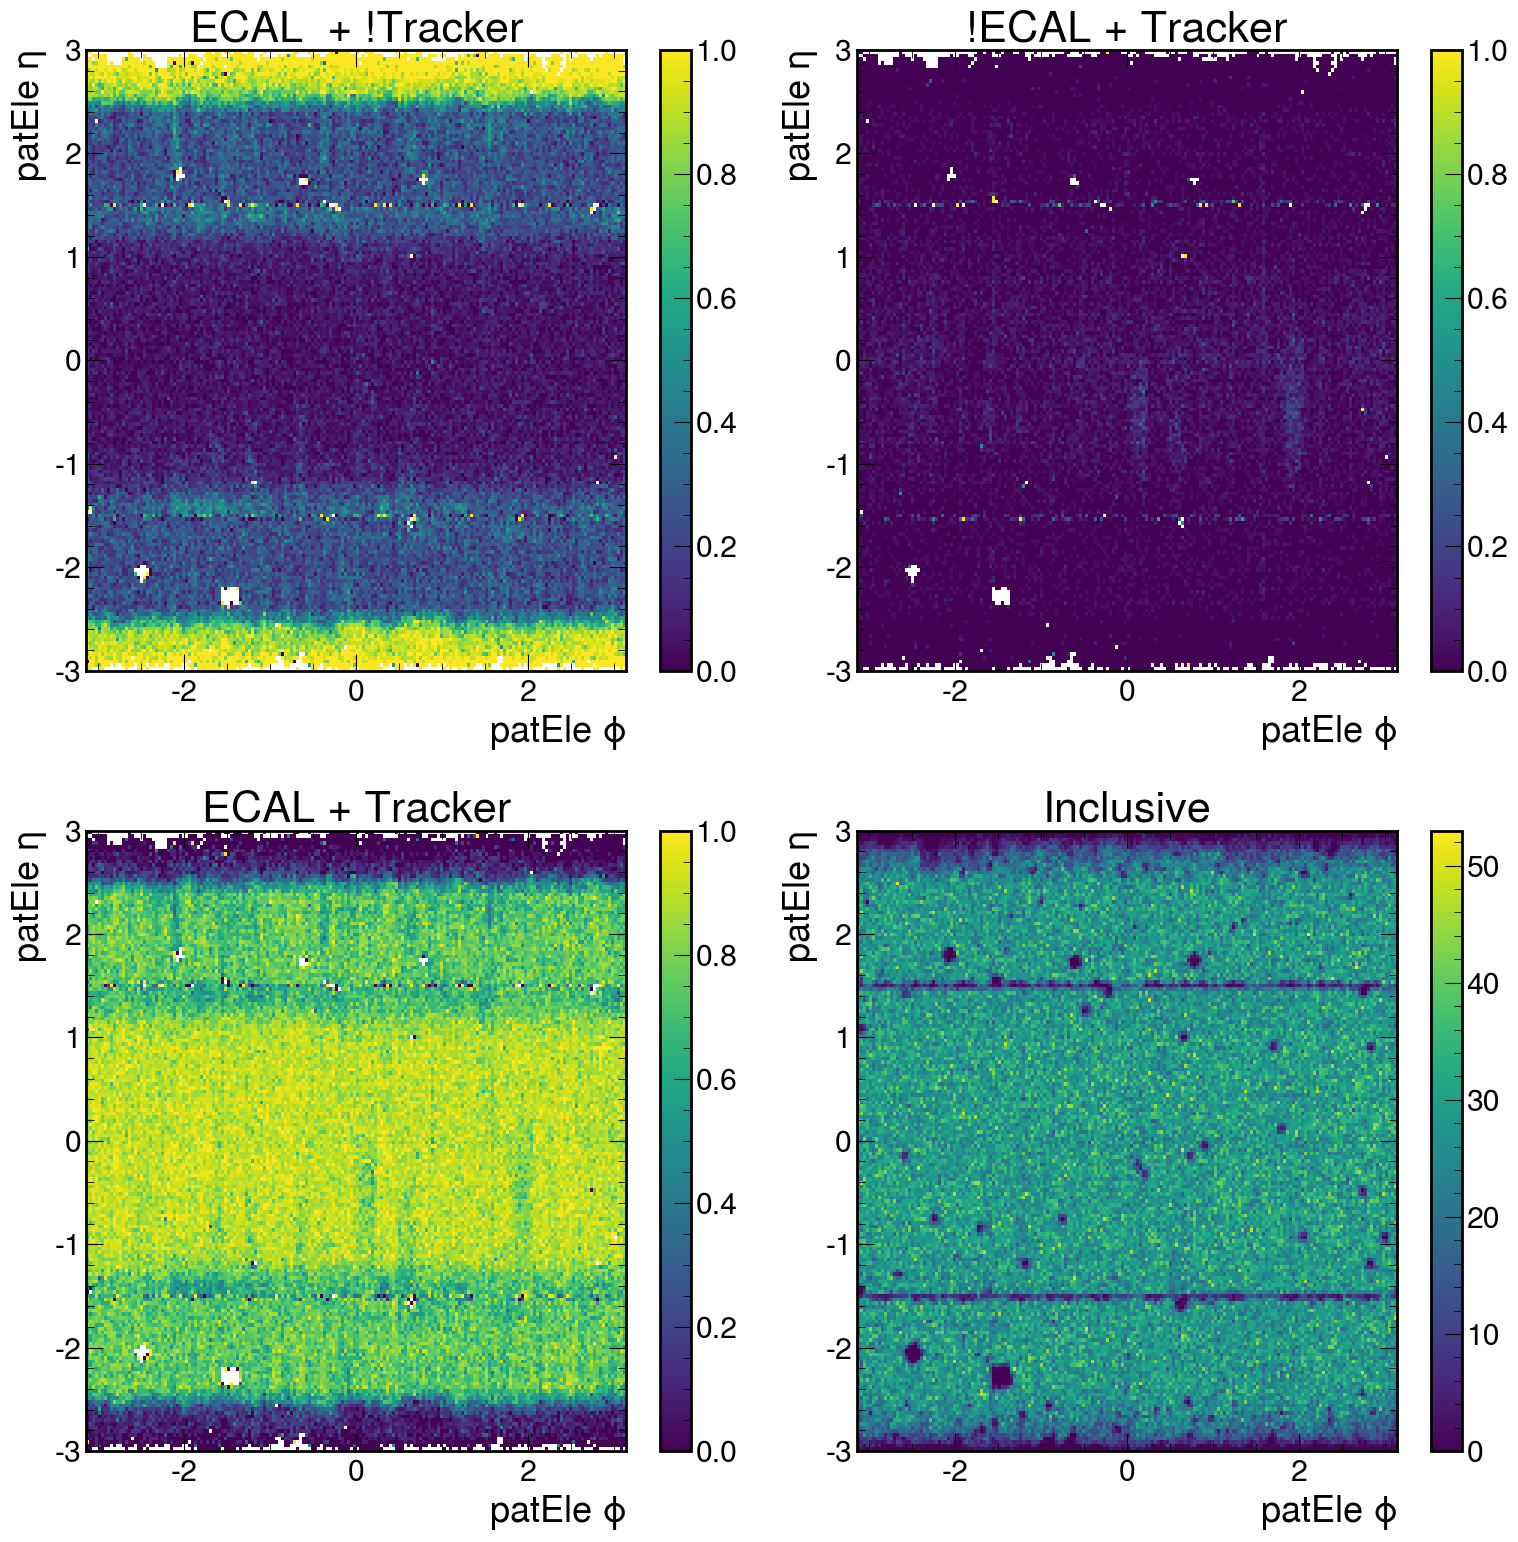

In [29]:
bins = (180, 170)
rrange = ((-np.pi, np.pi),(-3,3))

ecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

noecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

ecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

noecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

N_tot, xbins, ybins = np.histogram2d(dfm["ele_phi"],
                                    dfm["ele_eta"],
               bins=bins, range=rrange )


X, Y = np.meshgrid(xbins, ybins)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))
plt.tight_layout()


c1 = ax1.pcolormesh(X,Y, (ecal_notracker/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (noecal_tracker/N_tot).T,vmax=1, vmin=0)
c3 = ax3.pcolormesh(X,Y, (ecal_tracker/N_tot).T,vmax=1, vmin=0)
c4 = ax4.pcolormesh(X,Y, (N_tot).T)

ax1.set_ylabel("patEle $\eta$")
ax2.set_ylabel("patEle $\eta$")
ax3.set_ylabel("patEle $\eta$")
ax4.set_ylabel("patEle $\eta$")

ax1.set_xlabel("patEle $\phi$")
ax2.set_xlabel("patEle $\phi$")
ax3.set_xlabel("patEle $\phi$")
ax4.set_xlabel("patEle $\phi$")

ax1.set_title("ECAL  + !Tracker")
ax2.set_title("!ECAL + Tracker")
ax3.set_title("ECAL + Tracker")
ax4.set_title("Inclusive")


plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
fig.savefig(f"{output_folder}/patElectron_efficiency_fractions.png")

# Analyze difference between those two regions

In [30]:
dfhole = dfm[(dfm.ele_isEcalDriven == 0)&(dfm.ele_phi>0.5)&(dfm.ele_phi<1.5)&(dfm.ele_eta.abs()<1.5)]
dfgood = dfm[(dfm.ele_isEcalDriven == 1)&(dfm.ele_phi<0)&(dfm.ele_phi>-1)&(dfm.ele_eta.abs()<1.5)]

dfhole_incl = dfm[(dfm.ele_phi>0.5)&(dfm.ele_phi<1.5)&(dfm.ele_eta.abs()<1.5)]
dfgood_incl = dfm[(dfm.ele_phi<0)&(dfm.ele_phi>-1)&(dfm.ele_eta.abs()<1.5)]
dfgood_ee = dfm[(dfm.ele_isEcalDriven == 1)&(dfm.ele_eta.abs()>=1.5)]

B: 49.99999999999999
A. 50.0


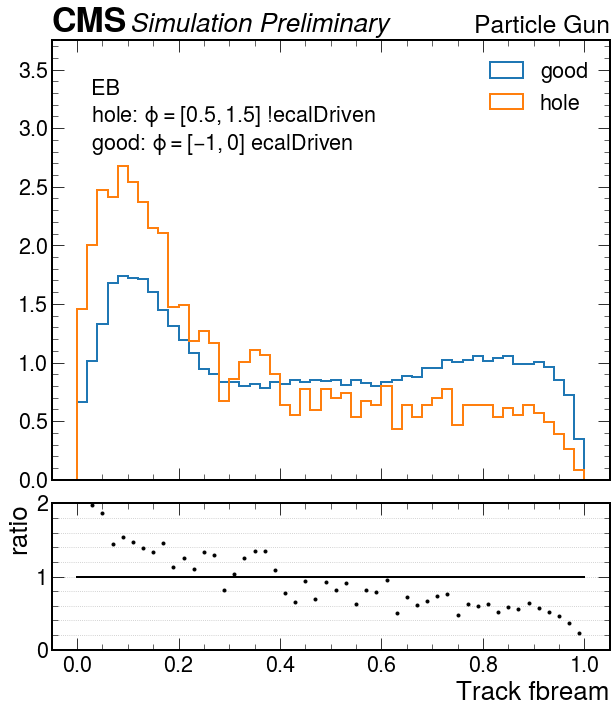

In [31]:
plot_comparison(
    dfgood.ele_tracfbrem,
    dfhole.ele_tracfbrem,
                var=f"track_fbrem", label="Track fbream",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=50, xrange=(0,1), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 0.09999999999999999
A. 0.1


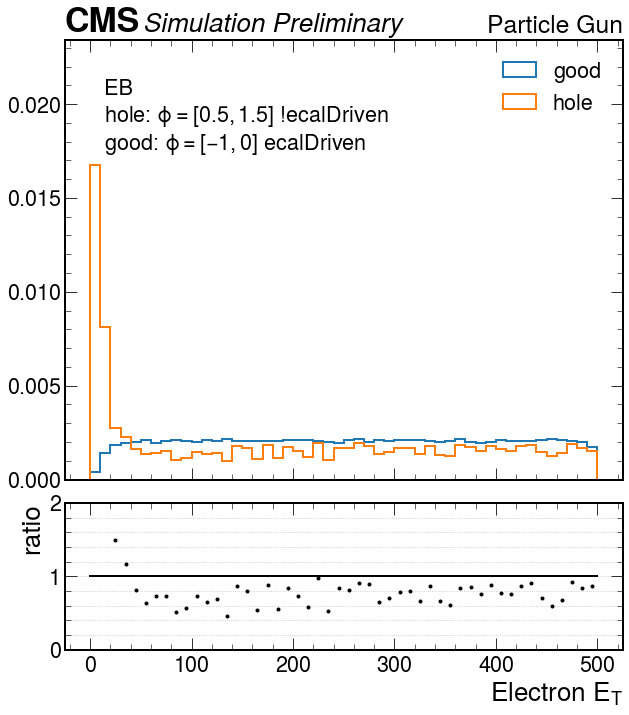

In [32]:
plot_comparison(dfgood.ele_et,
                dfhole.ele_et,
                var=f"good_vs_bad_electronEt", label="Electron $E_T$",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=50, xrange=(0,500), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 0.08333333333333333
A. 0.08333333333333334


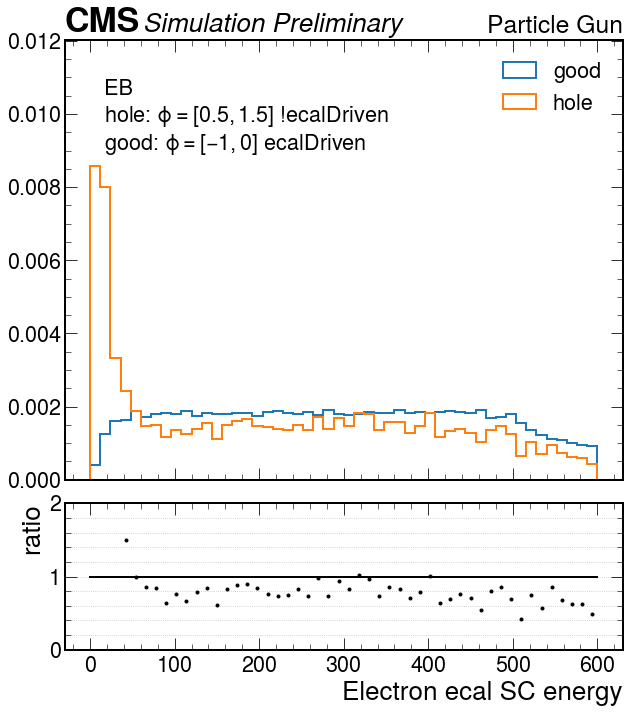

In [33]:
plot_comparison(
                dfgood.ele_ecalSCEnergy,dfhole.ele_ecalSCEnergy,
                var=f"good_vs_bad_ecalSC", label="Electron ecal SC energy",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=50, xrange=(0,600), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 1.0
A. 1.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: invalid value encountered in divide
  A/B,


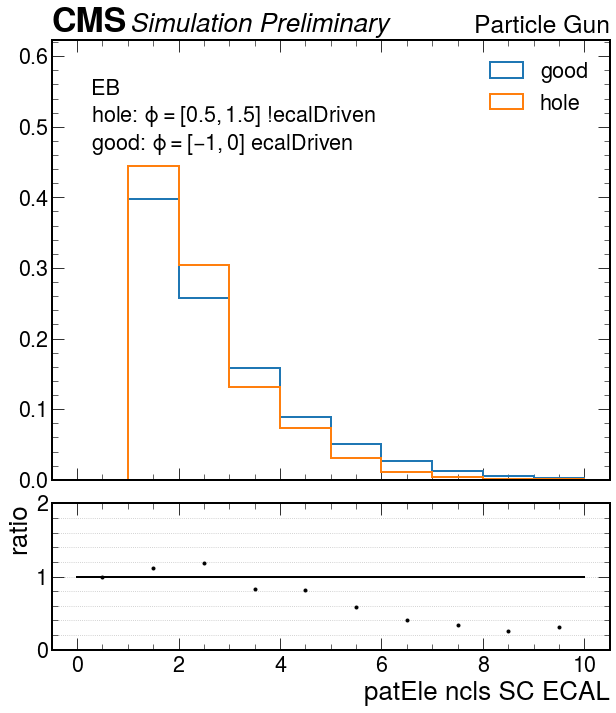

In [34]:
plot_comparison(dfgood.ele_nclsEcalSC,
                dfhole.ele_nclsEcalSC,
                var=f"good_vs_bad_nclsSCEcal", label="patEle ncls SC ECAL",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=10, xrange=(0,10), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 3000.0
A. 2999.999999999999


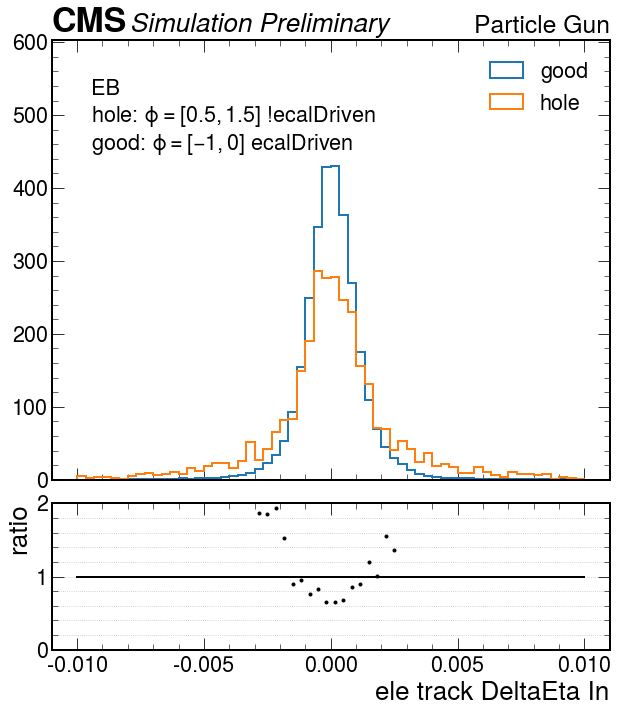

In [35]:
plot_comparison(dfgood.ele_trackDeltaEtaIn,
                dfhole.ele_trackDeltaEtaIn,
                var=f"ele_trackDeltaEtaIN", label="ele track DeltaEta In",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 999.9999999999995
A. 999.9999999999998


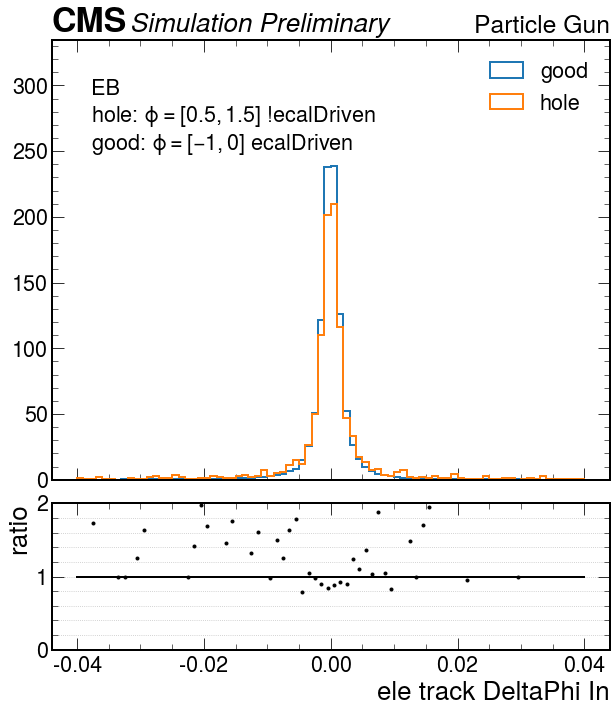

In [36]:
plot_comparison(dfgood.ele_trackDeltaPhiIn,
                dfhole.ele_trackDeltaPhiIn,
                var=f"ele_trackDeltaPhiIN", label="ele track DeltaPhi In",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.04,0.04), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 3000.0000000000005
A. 3000.0


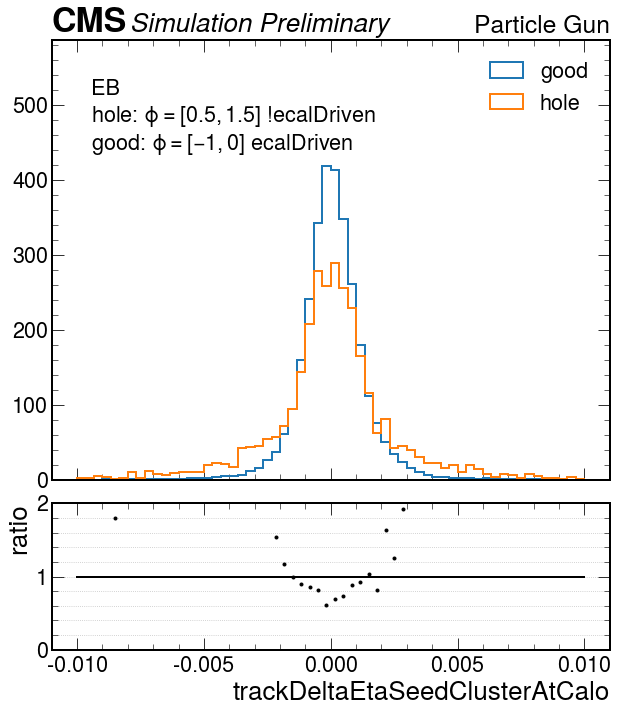

In [37]:
plot_comparison(dfgood.ele_trackDeltaEtaSeedClusterAtCalo,
                dfhole.ele_trackDeltaEtaSeedClusterAtCalo,
                var=f"ele_trackDeltaEtaSeedClusterAtCalo", label="trackDeltaEtaSeedClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 3000.0000000000005
A. 3000.0


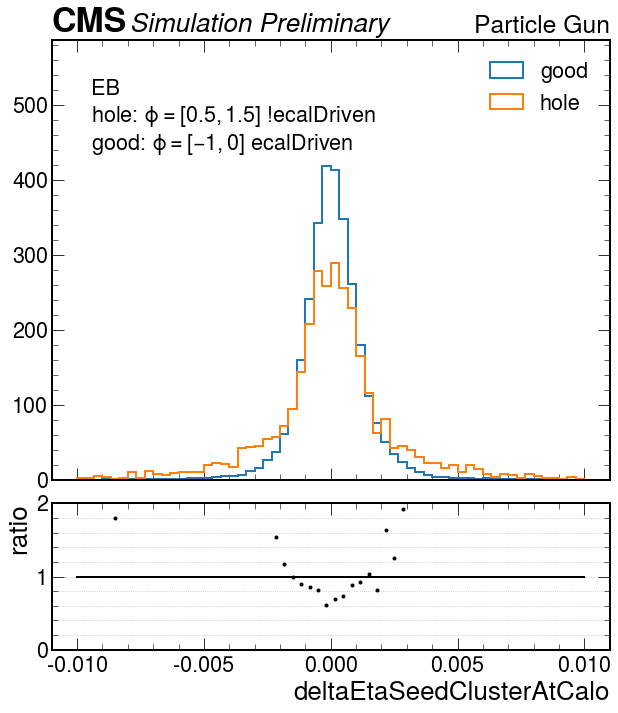

In [38]:
plot_comparison(dfgood.ele_deltaEtaSeedClusterAtCalo,
                dfhole.ele_deltaEtaSeedClusterAtCalo,
                var=f"deltaEtaSeedClusterAtCalo", label="deltaEtaSeedClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 3000.0000000000005
A. 3000.0


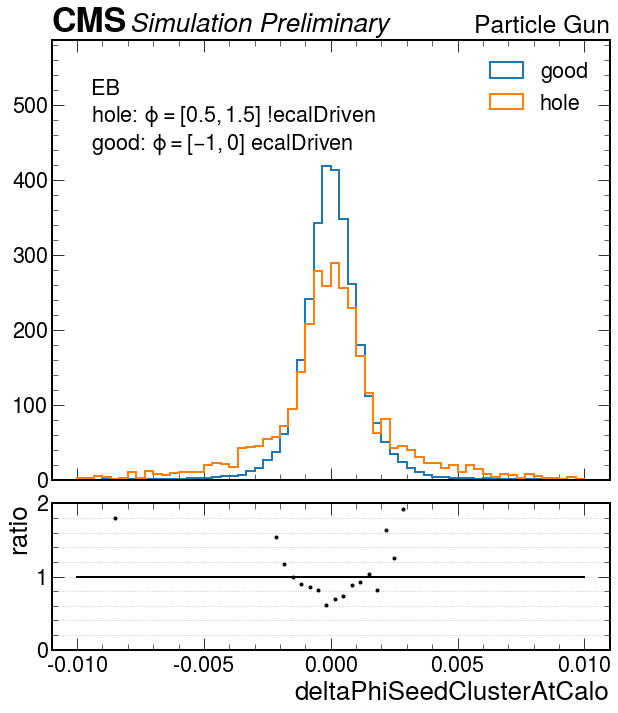

In [39]:
plot_comparison(dfgood.ele_deltaPhiSeedClusterAtCalo,
                dfhole.ele_deltaPhiSeedClusterAtCalo,
                var=f"deltaPhiSeedClusterAtCalo", label="deltaPhiSeedClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 4000.0
A. 4000.0


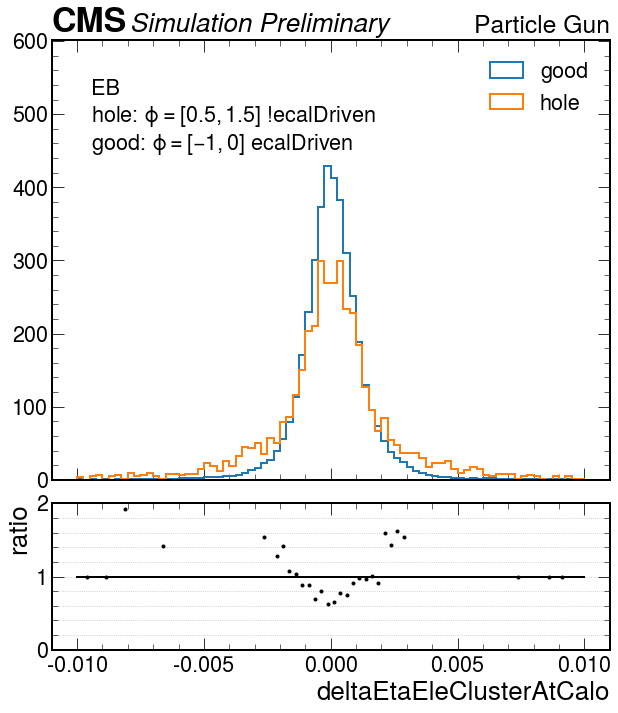

In [40]:
plot_comparison(dfgood.ele_deltaEtaEleClusterAtCalo,
                dfhole.ele_deltaEtaEleClusterAtCalo,
                var=f"deltaEtaEleClusterAtCalo", label="deltaEtaEleClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 999.9999999999998
A. 999.9999999999997


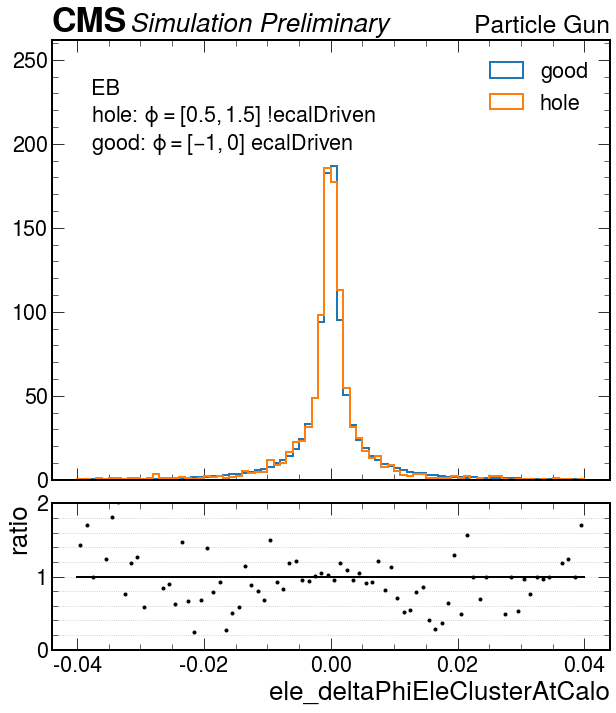

In [41]:
plot_comparison(dfgood.ele_deltaPhiEleClusterAtCalo,
                dfhole.ele_deltaPhiEleClusterAtCalo,
                var=f"ele_deltaPhiEleClusterAtCalo", label="ele_deltaPhiEleClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.04,0.04), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 0.06
A. 0.060000000000000005


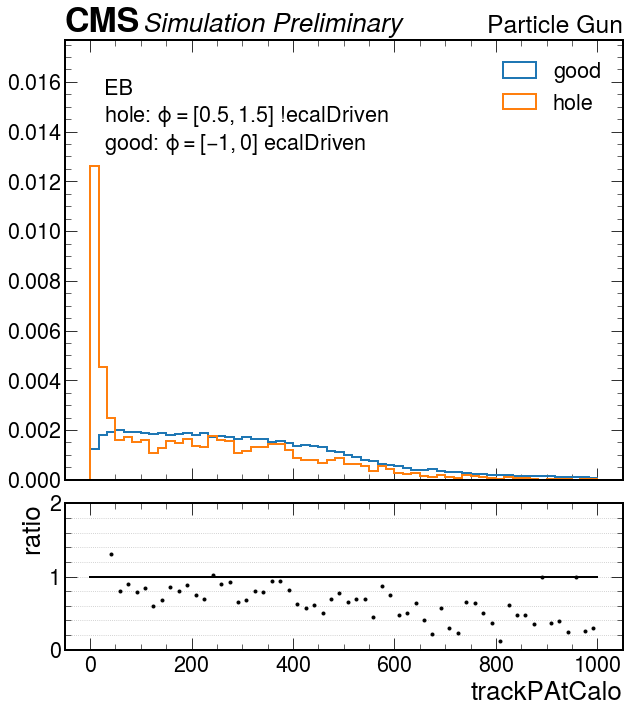

In [42]:
plot_comparison(dfgood.ele_trackPAtCalo,
                dfhole.ele_trackPAtCalo,
                var=f"ele_trackPAtCalo", label="trackPAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(0, 1000), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 79.99999999999994
A. 79.99999999999997


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: invalid value encountered in divide
  A/B,


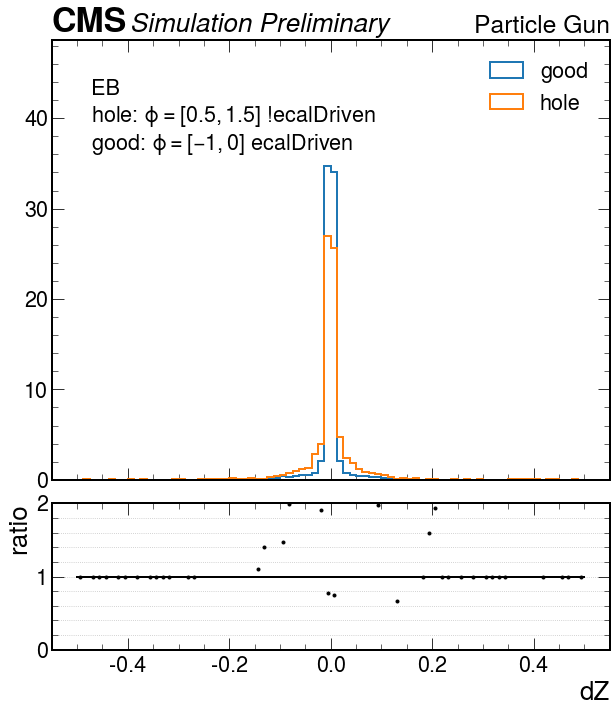

In [43]:
plot_comparison(dfgood.ele_dz,
                dfhole.ele_dz,
                var=f"ele_dz", label="dZ",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.5,0.5), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 199.9999999999999
A. 199.99999999999991


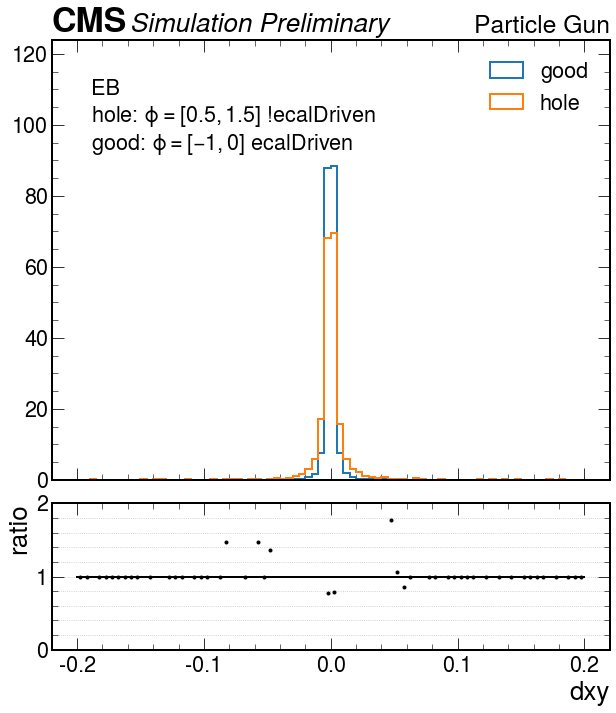

In [44]:
plot_comparison(dfgood.ele_dxy,
                dfhole.ele_dxy,
                var=f"ele_dxy", label="dxy",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.2,0.2), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 199.99999999999986
A. 199.9999999999999


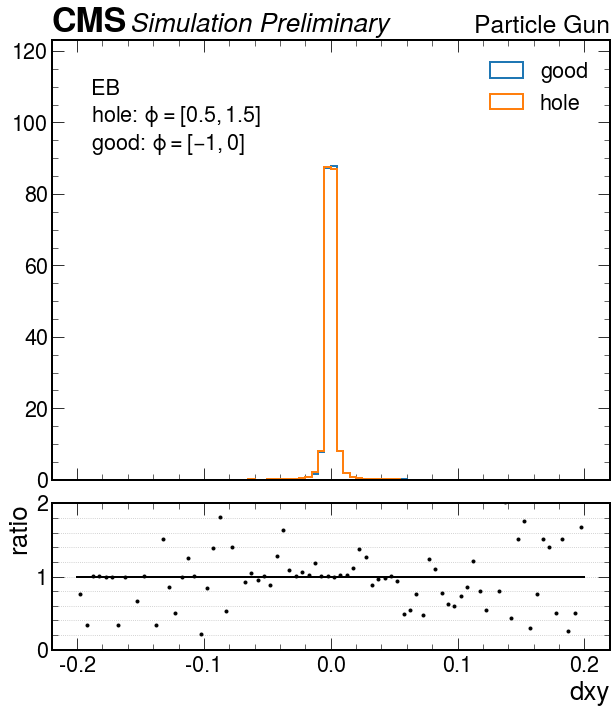

In [45]:
plot_comparison(dfgood_incl.ele_dxy,
                dfhole_incl.ele_dxy,
                var=f"ele_dxy_incl", label="dxy",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$\ngood: $\phi = [-1, 0]$",
                output_folder=output_folder,
                bins=80, xrange=(-0.2,0.2), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 199.9999999999999
A. 199.99999999999994


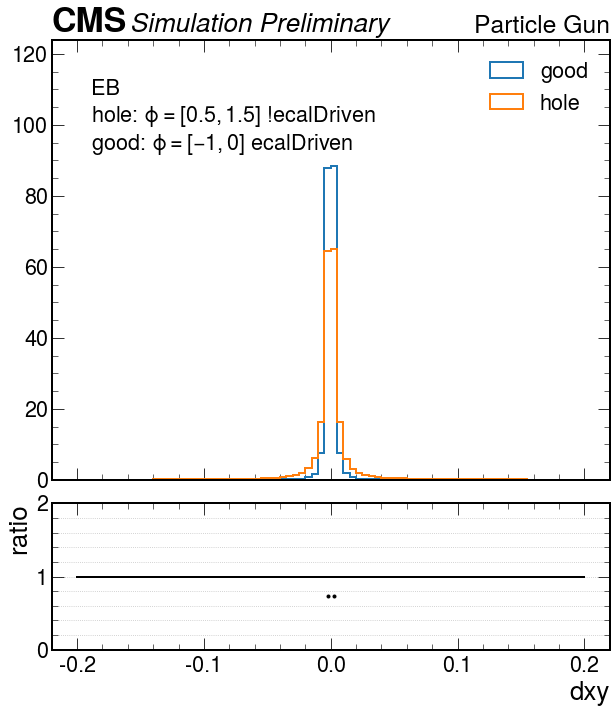

In [46]:
plot_comparison(dfgood.ele_dxy,
                dfgood_ee.ele_dxy,
                var=f"ele_dxy_good_vs_goodee", label="dxy",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.2,0.2), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

# Photons

In [47]:
dfp = dfm[dfm.deltaR_genPart_pho<0.2]

Text(0.5, 1.0, 'matched dR patPhoton')

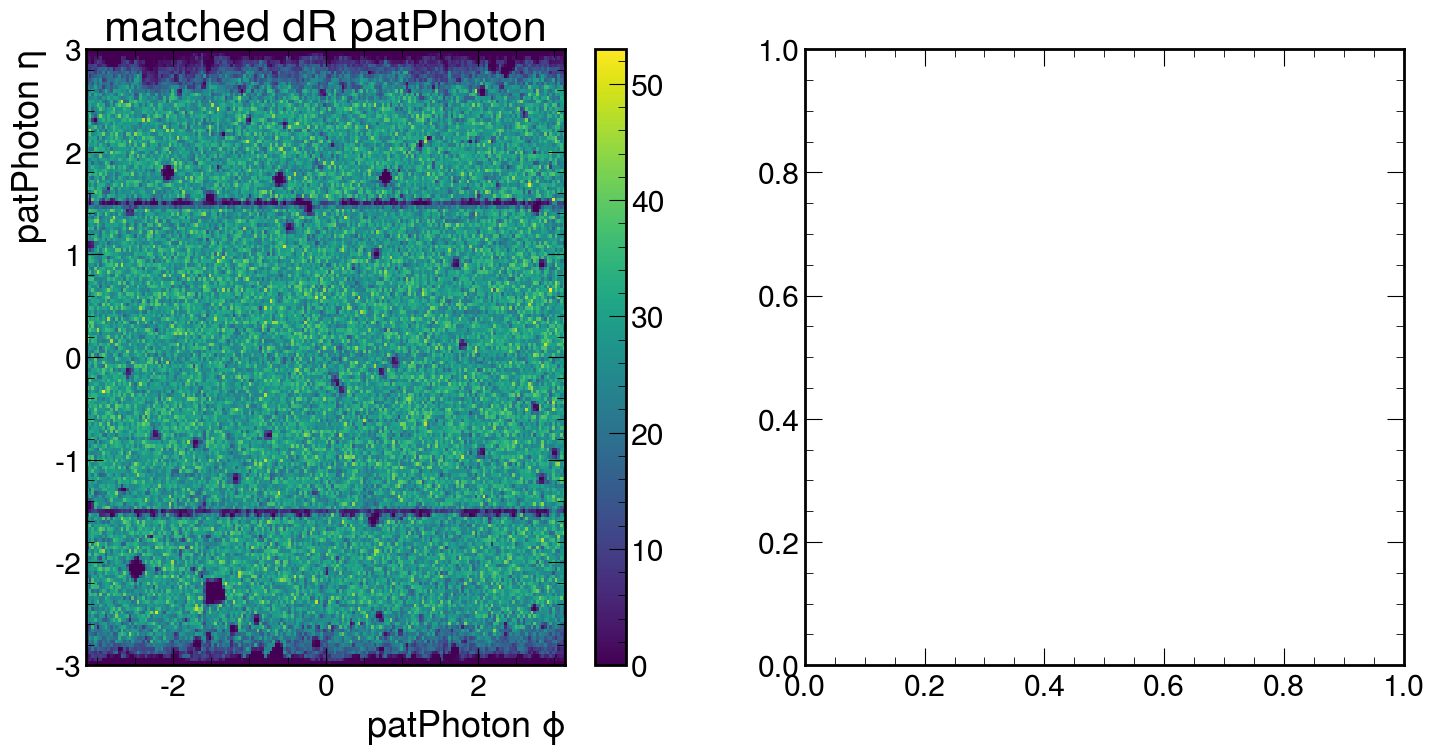

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

*b, C = ax1.hist2d(dfp.pho_phi, dfp.pho_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patPhoton $\phi$")
ax1.set_ylabel("patPhoton $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("matched dR patPhoton")

# DY analysis

In [10]:
from coffea.util import load
import mplhep as hpl

In [112]:
out = load("/work/dvalsecc/ttHbb/AnalysisConfigs/configs/run3_DY_clustering/output_test_v1/output_all.coffea")

In [113]:
out

{'sum_genweights': {'DYToLL_M-50_2023': 96296980.0},
 'sumw': {'EB_good': {'DYToLL_M-50_2023': {'DYToLL_M-50': 5154842.0}},
  'EB_bad': {'DYToLL_M-50_2023': {'DYToLL_M-50': 5125909.0}},
  'inclusive': {'DYToLL_M-50_2023': {'DYToLL_M-50': 34918678.0}}},
 'cutflow': {'initial': {'DYToLL_M-50_2023': 96296977},
  'skim': {'DYToLL_M-50_2023': 96278604},
  'presel': {'DYToLL_M-50_2023': 34918678},
  'EB_good': {'DYToLL_M-50_2023': {'DYToLL_M-50': 5154842}},
  'EB_bad': {'DYToLL_M-50_2023': {'DYToLL_M-50': 5125909}},
  'inclusive': {'DYToLL_M-50_2023': {'DYToLL_M-50': 34918678}}},
 'variables': {'ele_eta_phi': defaultdict(dict,
              {'DYToLL_M-50': {'DYToLL_M-50_2023': Hist(
                  StrCategory(['EB_bad', 'EB_good', 'inclusive'], name='cat', label='Category'),
                  StrCategory(['nominal'], name='variation', label='Variation'),
                  Regular(180, -3.14, 3.14, name='Electron.phi', label='electron $\\phi$'),
                  Regular(170, -3, 3, name='

In [95]:
H

Hist(
  StrCategory(['EB_bad', 'EB_good', 'inclusive'], name='cat', label='Category'),
  StrCategory(['nominal'], name='variation', label='Variation'),
  Regular(180, -3.14, 3.14, name='Electron.phi', label='electron $\\phi$'),
  Regular(170, -3, 3, name='Electron.eta', label='electron $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=1.21337e+07, variance=1.21337e+07) (WeightedSum(value=1.21392e+07, variance=1.21392e+07) with flow)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f5435720dc0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f54356e0af0>, text=[])

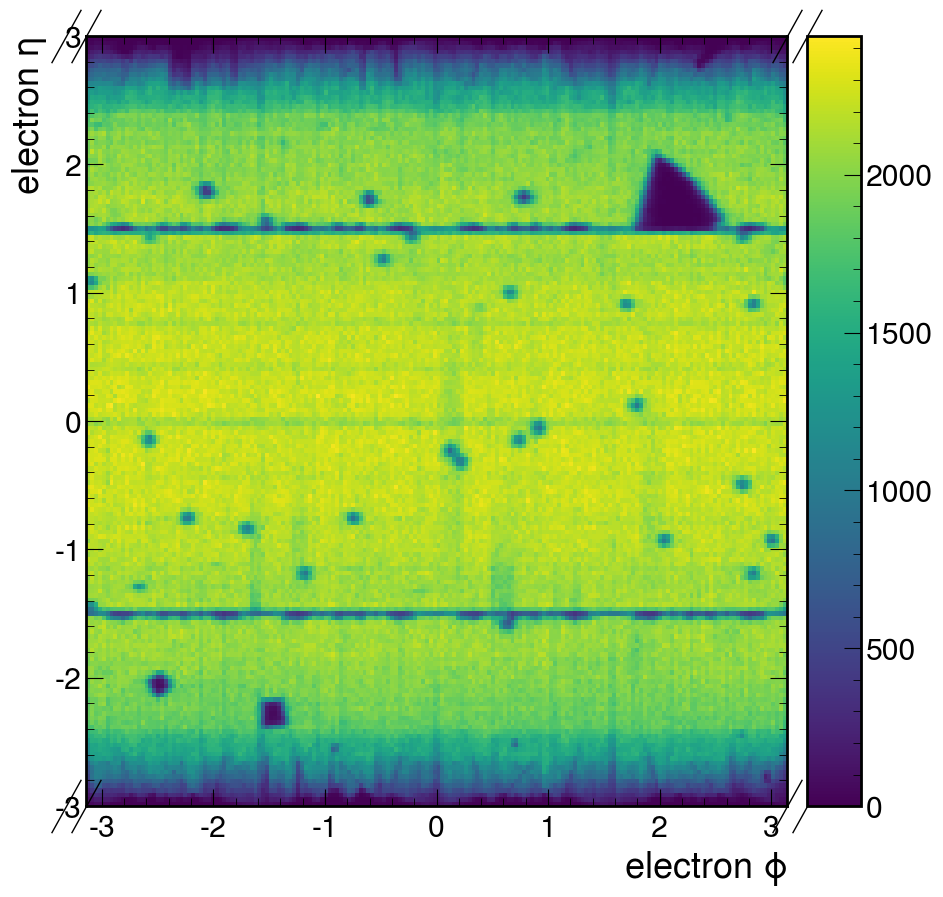

In [114]:
H = out["variables"]['ele_eta_phi']['DYToLL_M-50']['DYToLL_M-50_2023']
hpl.hist2dplot(H['inclusive', 'nominal', :,:])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f544f1e4940>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f4eb5dca430>, text=[])

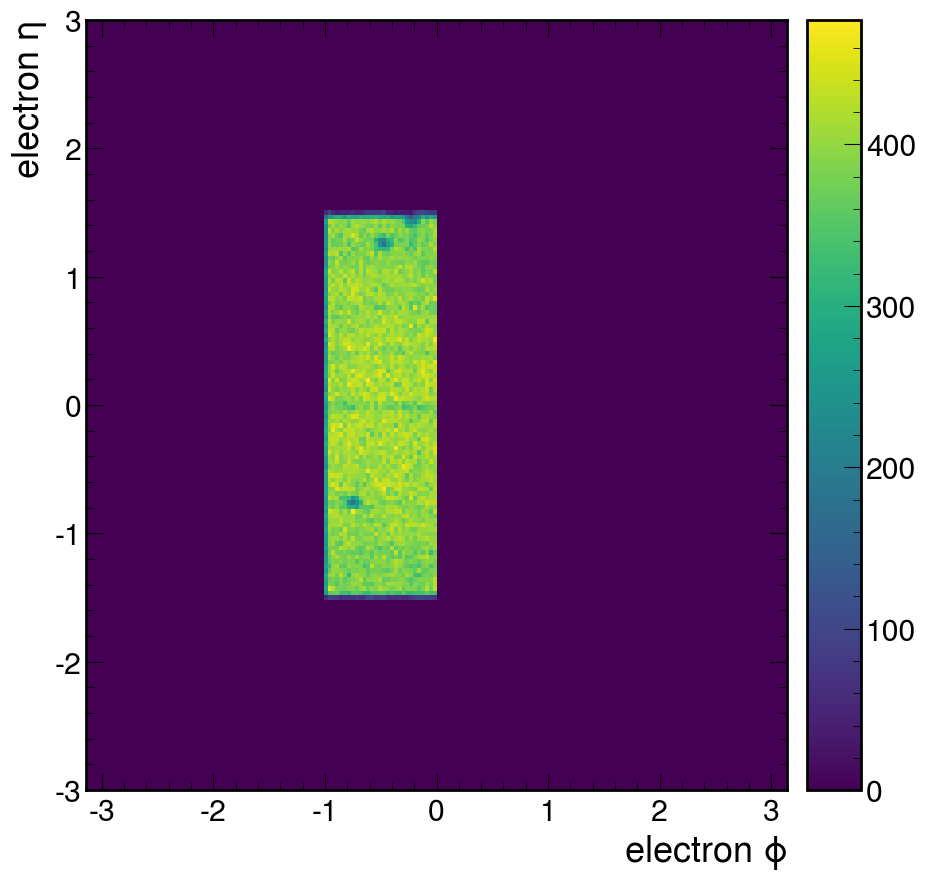

In [96]:
H = out["variables"]['ele_eta_phi']['DYToLL_M-50']['DYToLL_M-50_2023']
hpl.hist2dplot(H['EB_good', 'nominal', :,:])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f4eb5bfa7c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f4eb5c50610>, text=[])

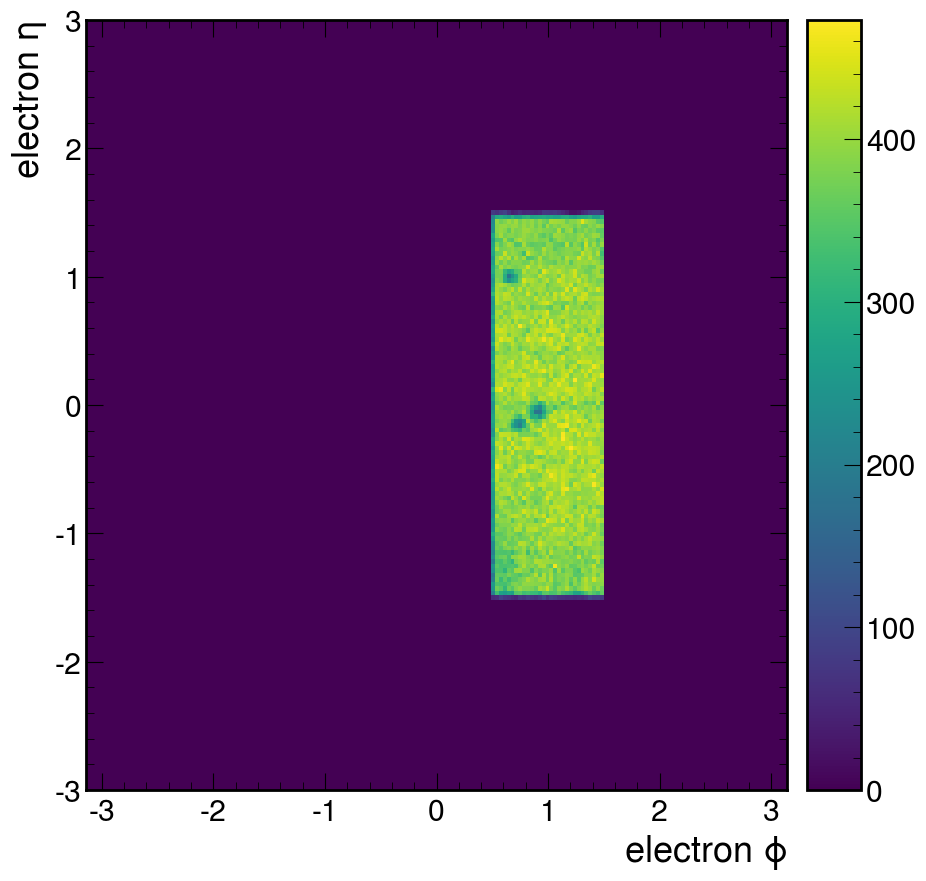

In [97]:
H = out["variables"]['ele_eta_phi']['DYToLL_M-50']['DYToLL_M-50_2023']
hpl.hist2dplot(H['EB_bad', 'nominal', :,:])

In [98]:
H = out["variables"]['dxy_dz_phi']['DYToLL_M-50']['DYToLL_M-50_2023']


In [101]:
from matplotlib.colors import LogNorm

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f54359a0940>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f543557ee80>, text=[])

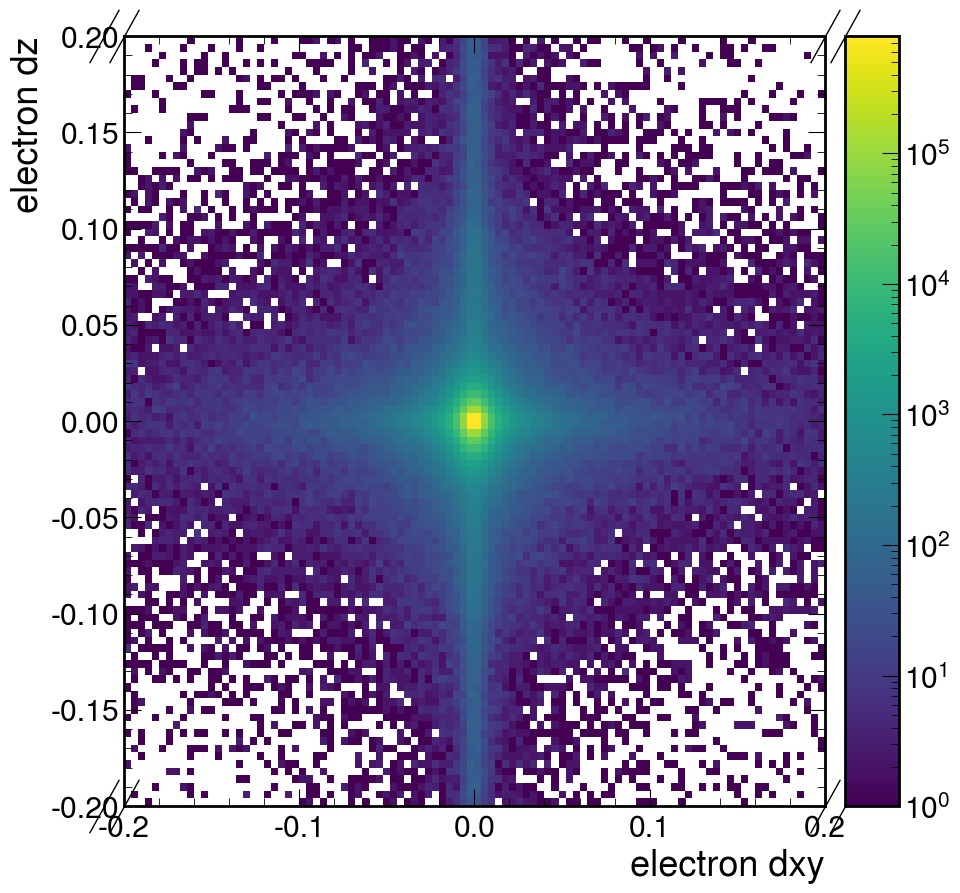

In [115]:
H = out["variables"]['dxy_dz_phi']['DYToLL_M-50']['DYToLL_M-50_2023']
hpl.hist2dplot(H['EB_bad', 'nominal', :,:], norm=LogNorm())

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f54356437c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f5435557f40>, text=[])

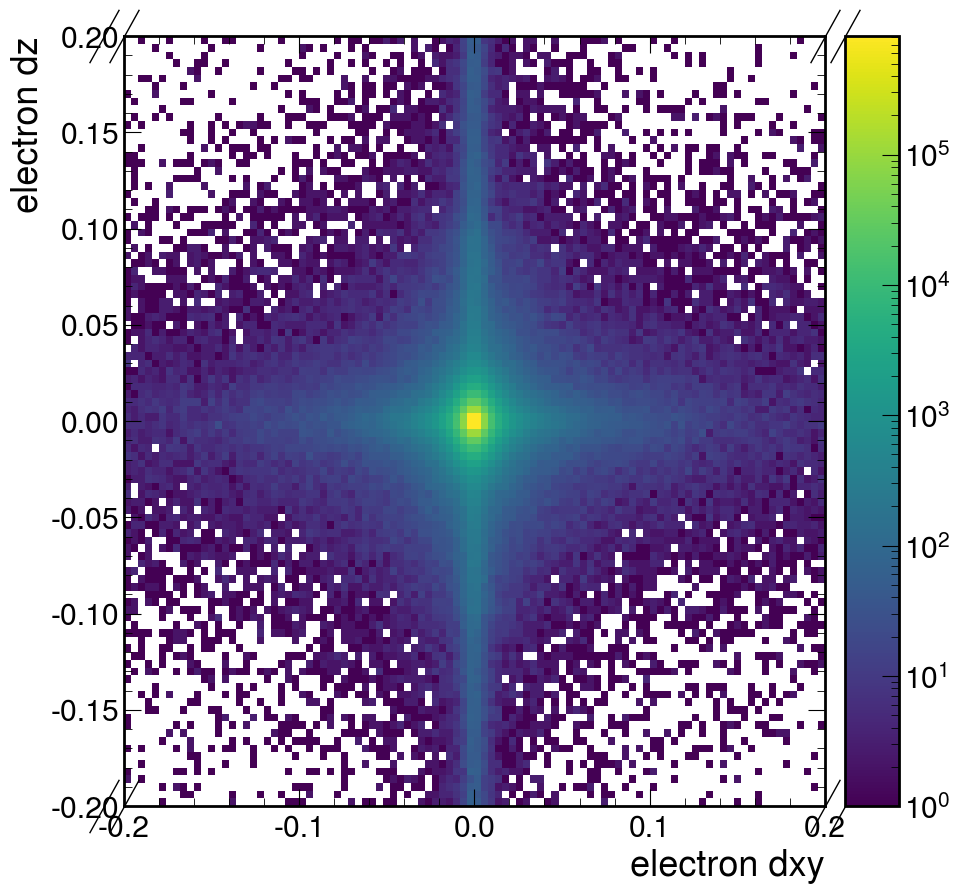

In [116]:
H = out["variables"]['dxy_dz_phi']['DYToLL_M-50']['DYToLL_M-50_2023']
hpl.hist2dplot(H['EB_good', 'nominal', :,:], norm=LogNorm())

In [16]:
H = out["variables"]['dxy_dz_phi']['DYToLL_M-50']['DYToLL_M-50_2023']
hpl.histplot(H['EB_bad', 'nominal', sum,:], label="bad")
hpl.histplot(H['EB_good', 'nominal', sum,:], label="good")
plt.yscale("log")
plt.legend()

KeyError: 'DYToLL_M-50_2023'

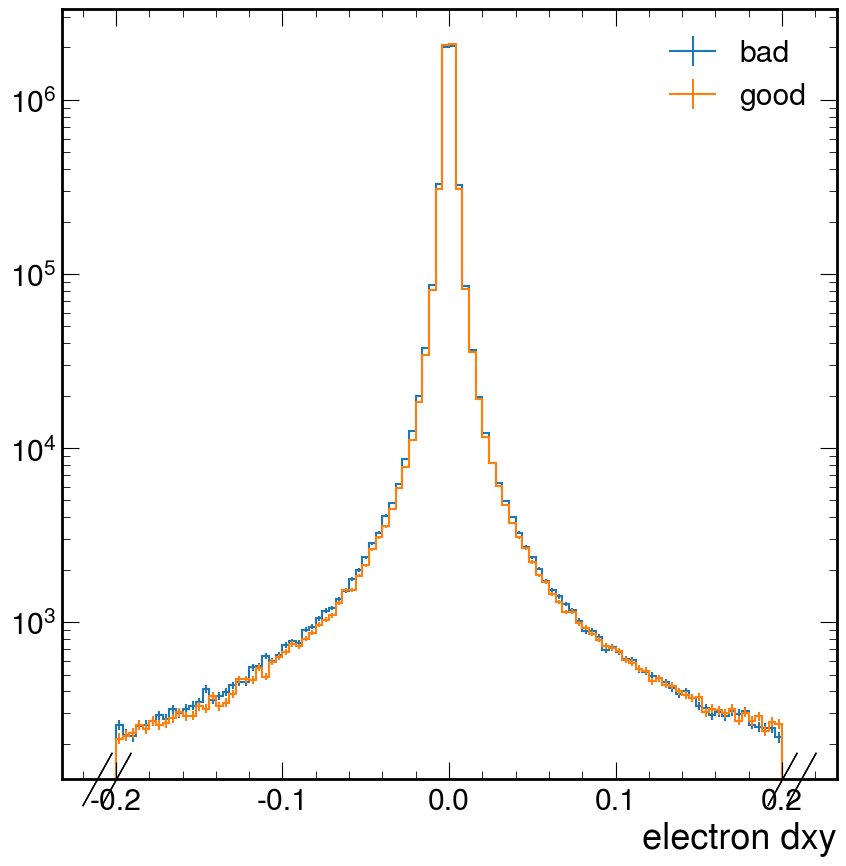

In [130]:
H = out["variables"]['dxy_dz_phi']['DYToLL_M-50']['DYToLL_M-50_2023']
hpl.histplot(H['EB_bad', 'nominal', :, sum], label="bad")
hpl.histplot(H['EB_good', 'nominal', :, sum], label="good")
plt.yscale("log")
plt.legend()

In [17]:
out = load("/work/dvalsecc/ttHbb/AnalysisConfigs/configs/run3_DY_clustering/output_gun_v1/output_FourElectronsGun.coffea")

In [18]:
out

{'sum_genweights': {'FourElectronsGun': 992000.0},
 'sumw': {'EB_good': {'FourElectronsGun': {'FourElectronsGun': 268745.0}},
  'EB_bad': {'FourElectronsGun': {'FourElectronsGun': 229663.0}},
  'inclusive': {'FourElectronsGun': {'FourElectronsGun': 952633.0}}},
 'cutflow': {'initial': {'FourElectronsGun': 992000},
  'skim': {'FourElectronsGun': 953466},
  'presel': {'FourElectronsGun': 952633},
  'EB_good': {'FourElectronsGun': {'FourElectronsGun': 268745}},
  'EB_bad': {'FourElectronsGun': {'FourElectronsGun': 229663}},
  'inclusive': {'FourElectronsGun': {'FourElectronsGun': 952633}}},
 'variables': {'ele_eta_phi': defaultdict(dict,
              {'FourElectronsGun': {'FourElectronsGun': Hist(
                  StrCategory(['EB_bad', 'EB_good', 'inclusive'], name='cat', label='Category'),
                  StrCategory(['nominal'], name='variation', label='Variation'),
                  Regular(180, -3.14, 3.14, name='Electron.phi', label='electron $\\phi$'),
                  Regular

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f3ba018beb0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f3a47fd1a30>, text=[])

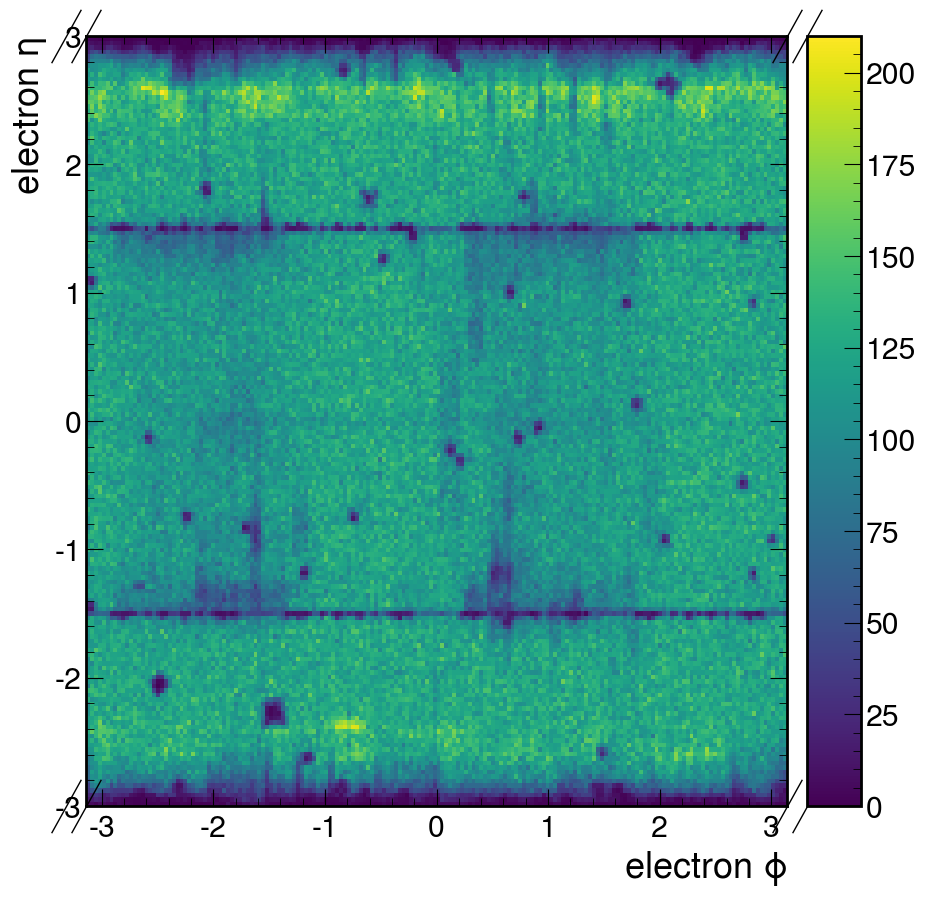

In [19]:
H = out["variables"]['ele_eta_phi']['FourElectronsGun']['FourElectronsGun']
hpl.hist2dplot(H['inclusive', 'nominal', :,:])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f3a47e19610>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f3a47d909d0>, text=[])

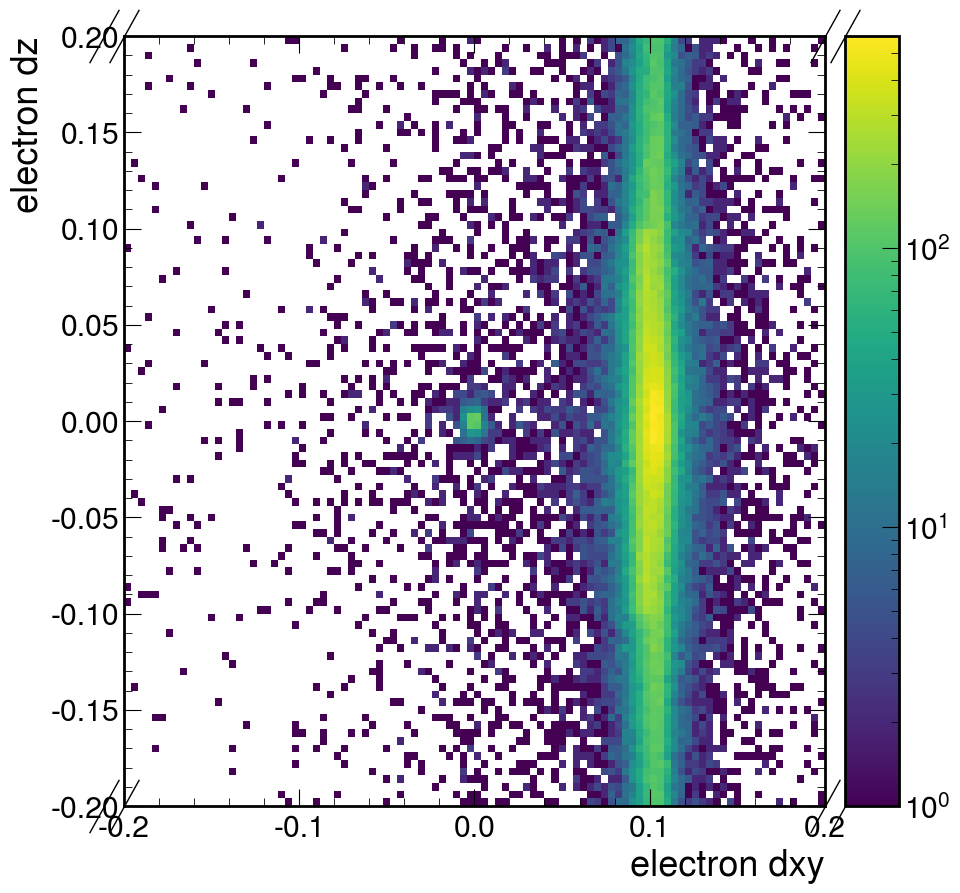

In [20]:
H = out["variables"]['dxy_dz_phi']['FourElectronsGun']['FourElectronsGun']
hpl.hist2dplot(H['EB_bad', 'nominal', :,:], norm=LogNorm())

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f3a47ba64f0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f3a47b6bd60>, text=[])

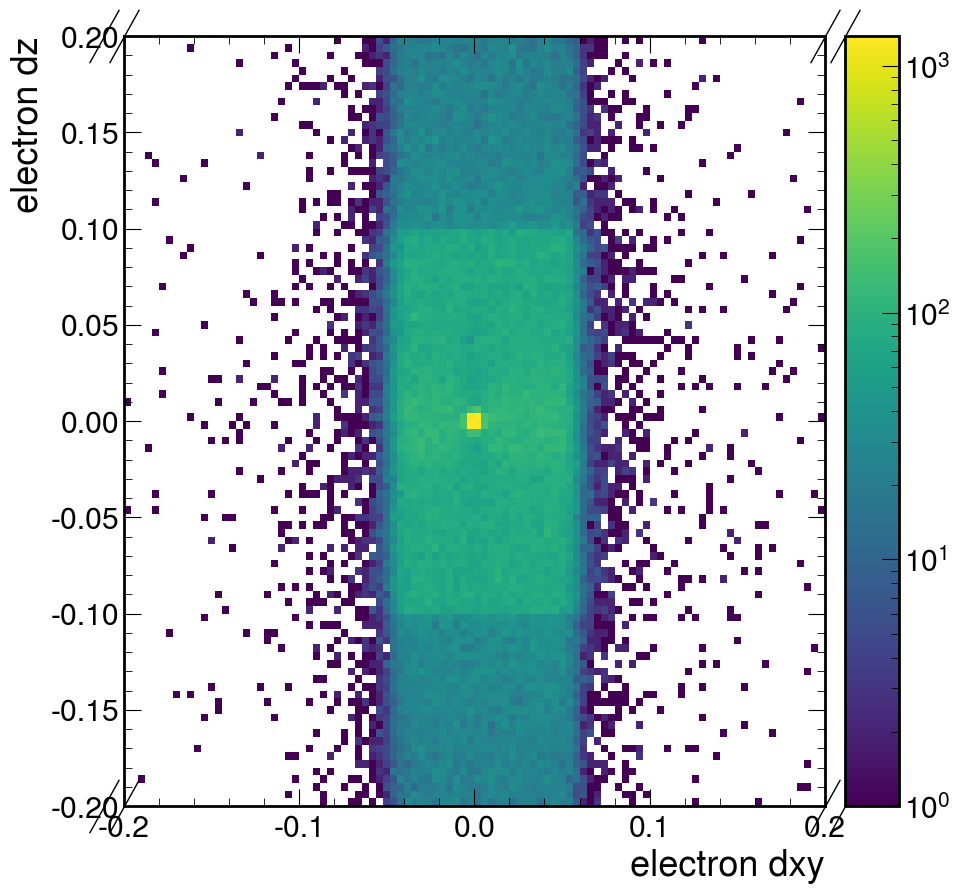

In [21]:
H = out["variables"]['dxy_dz_phi']['FourElectronsGun']['FourElectronsGun']
hpl.hist2dplot(H['EB_good', 'nominal', :,:], norm=LogNorm())

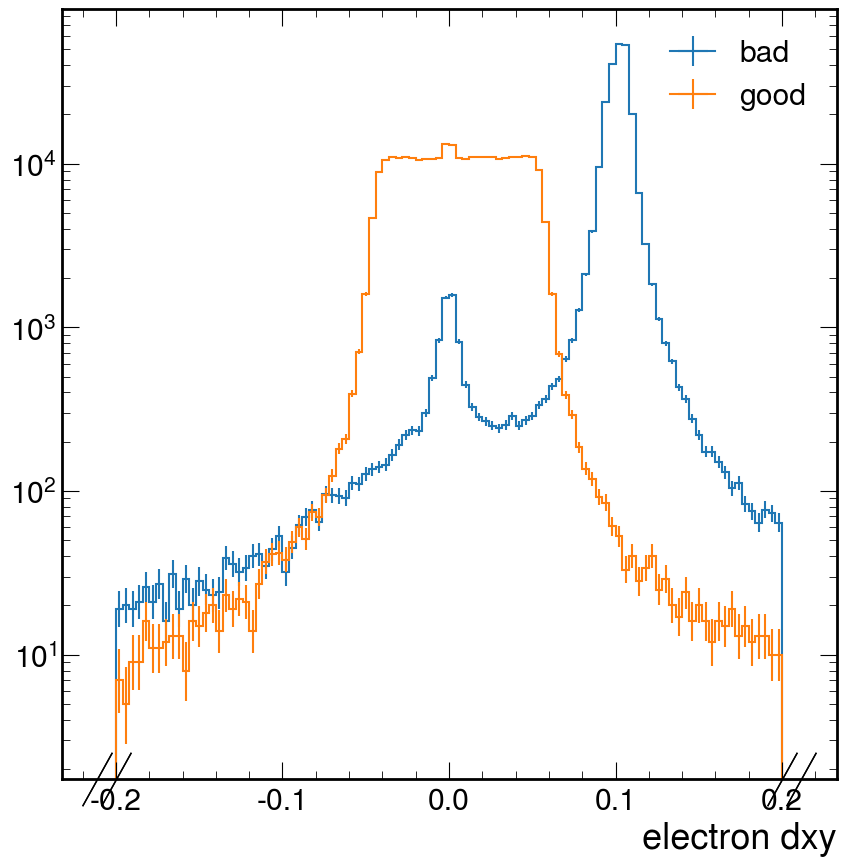

In [23]:
H = out["variables"]['dxy_dz_phi']["FourElectronsGun"]["FourElectronsGun"]
hpl.histplot(H['EB_bad', 'nominal', :, sum], label="bad")
hpl.histplot(H['EB_good', 'nominal', :, sum], label="good")
plt.yscale("log")
plt.legend()

In [132]:
from numpy.random import uniformat

ImportError: cannot import name 'uniformat' from 'numpy.random' (/t3home/dvalsecc/micromamba/envs/clustering/lib/python3.9/site-packages/numpy/random/__init__.py)

In [144]:
sample = np.random.random_sample(10000)*np.log(500)

Text(1, 0, 'log(ET)')

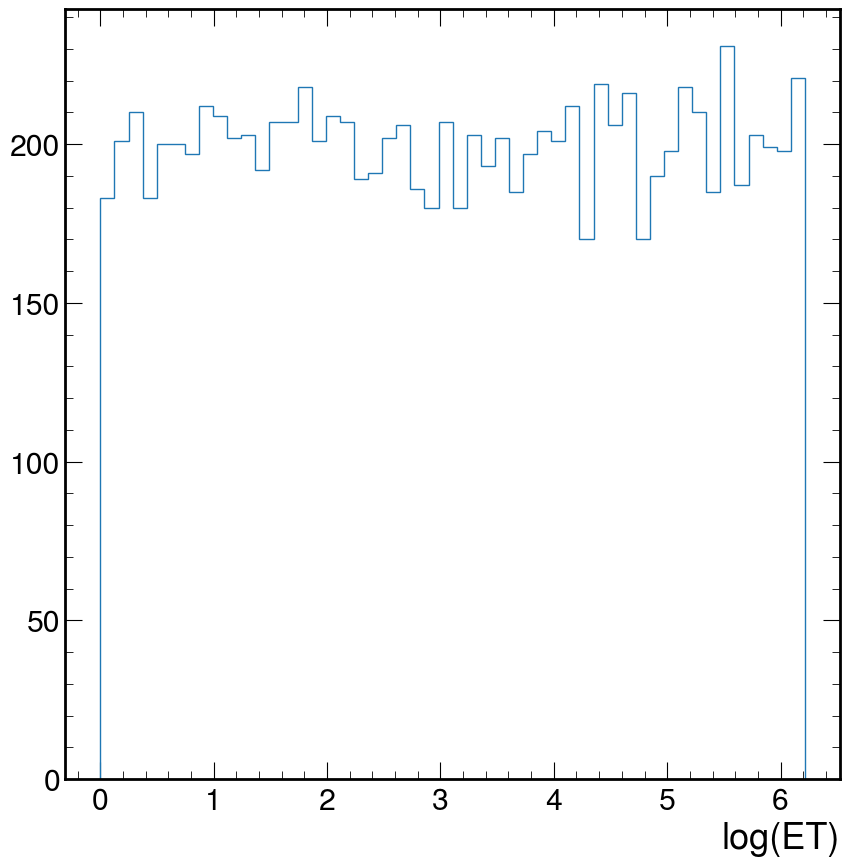

In [149]:
plt.hist(sample, bins=50, histtype="step");
plt.xlabel("log(ET)")

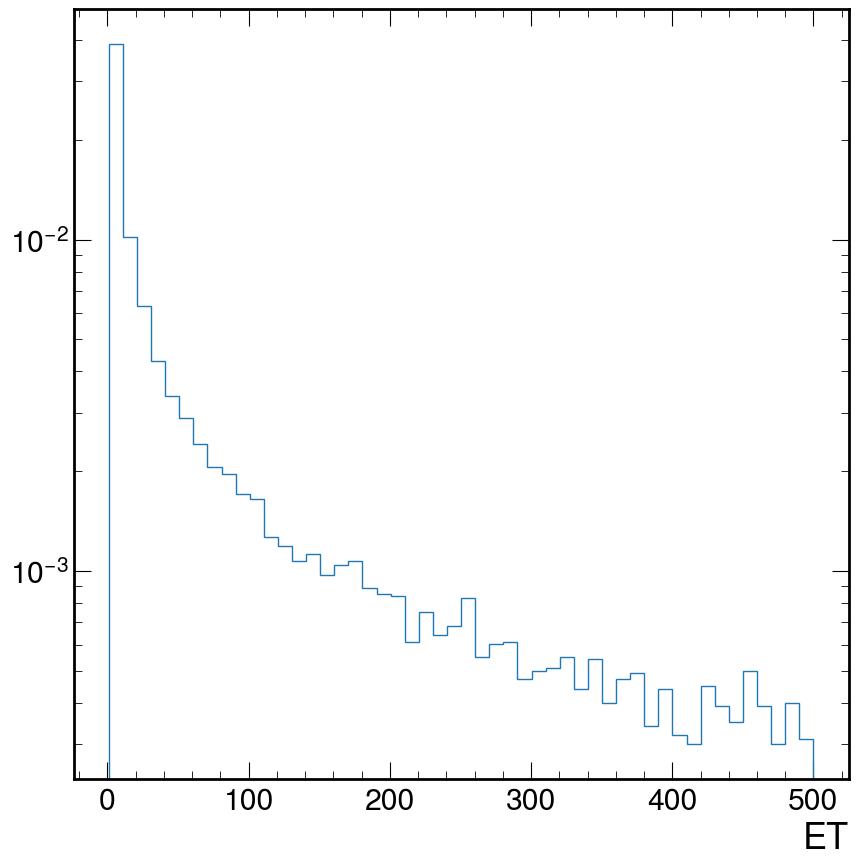

In [158]:
y = np.exp(sample)
y2 = np.random.exponential(1/500, 100000)
plt.hist(y,  bins=50, histtype="step", density=True);
#plt.hist(y2,  bins=50, histtype="step");

plt.xlabel("ET")
plt.yscale("log")

In [152]:
np.random.exponential?

Docstring:
exponential(scale=1.0, size=None)

Draw samples from an exponential distribution.

Its probability density function is

.. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),

for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
The rate parameter is an alternative, widely used parameterization
of the exponential distribution [3]_.

The exponential distribution is a continuous analogue of the
geometric distribution.  It describes many common situations, such as
the size of raindrops measured over many rainstorms [1]_, or the time
between page requests to Wikipedia [2]_.

.. note::
    New code should use the ``exponential`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
scale : float or array_like of floats
    The scale parameter, :math:`\beta = 1/\lambda`. Must be
    non-negative.
size : int or tuple

# Analyze the dumper output

In [3]:
input_folder_deep = "root://eoscms.cern.ch//eos/cms/store/group/dpg_ecal/alca_ecalcalib/bmarzocc/Clustering/CRAB_UserFiles/RECO_Mustache_standardReco_bsRealistic2022_126X_mcRun3_2023_forPU65_v4/230901_091655/"

In [10]:
files = ['output_1.root', 'output_100.root', 'output_11.root', 'output_12.root', 'output_13.root', 'output_14.root', 'output_16.root', 'output_19.root', 'output_2.root', 'output_20.root', 'output_21.root', 'output_23.root', 'output_24.root', 'output_25.root', 'output_26.root', 'output_27.root', 'output_28.root', 'output_3.root', 'output_30.root', 'output_31.root', 'output_32.root', 'output_33.root', 'output_34.root', 'output_35.root', 'output_37.root', 'output_38.root', 'output_39.root', 'output_4.root', 'output_40.root', 'output_41.root', 'output_42.root', 'output_43.root', 'output_44.root', 'output_45.root', 'output_46.root', 'output_47.root', 'output_48.root', 'output_49.root', 'output_5.root', 'output_50.root', 'output_51.root', 'output_52.root', 'output_53.root', 'output_54.root', 'output_55.root', 'output_57.root', 'output_58.root', 'output_59.root', 'output_6.root', 'output_60.root', 'output_61.root', 'output_62.root', 'output_63.root', 'output_64.root', 'output_68.root', 'output_69.root', 'output_70.root', 'output_71.root', 'output_73.root', 'output_74.root', 'output_75.root', 'output_77.root', 'output_78.root', 'output_79.root', 'output_8.root', 'output_80.root', 'output_81.root', 'output_82.root', 'output_83.root', 'output_84.root', 'output_85.root', 'output_86.root', 'output_87.root', 'output_88.root', 'output_89.root', 'output_90.root', 'output_92.root', 'output_94.root', 'output_95.root', 'output_96.root', 'output_97.root', 'output_98.root', 'output_99.root']

In [11]:
dfD = uproot.lazy([f"{input_folder_deep}/0000/{file}:recosimdumper/caloTree" for file in files], num_workers=10, allow_missing=True)

In [12]:
dfD

<Array [{eventId: 3, lumiId: 1, ... 0.0236]}] type='8300 * {"eventId": int64, "l...'>

Text(0.5, 1.0, 'ele dR match - trackerDriven')

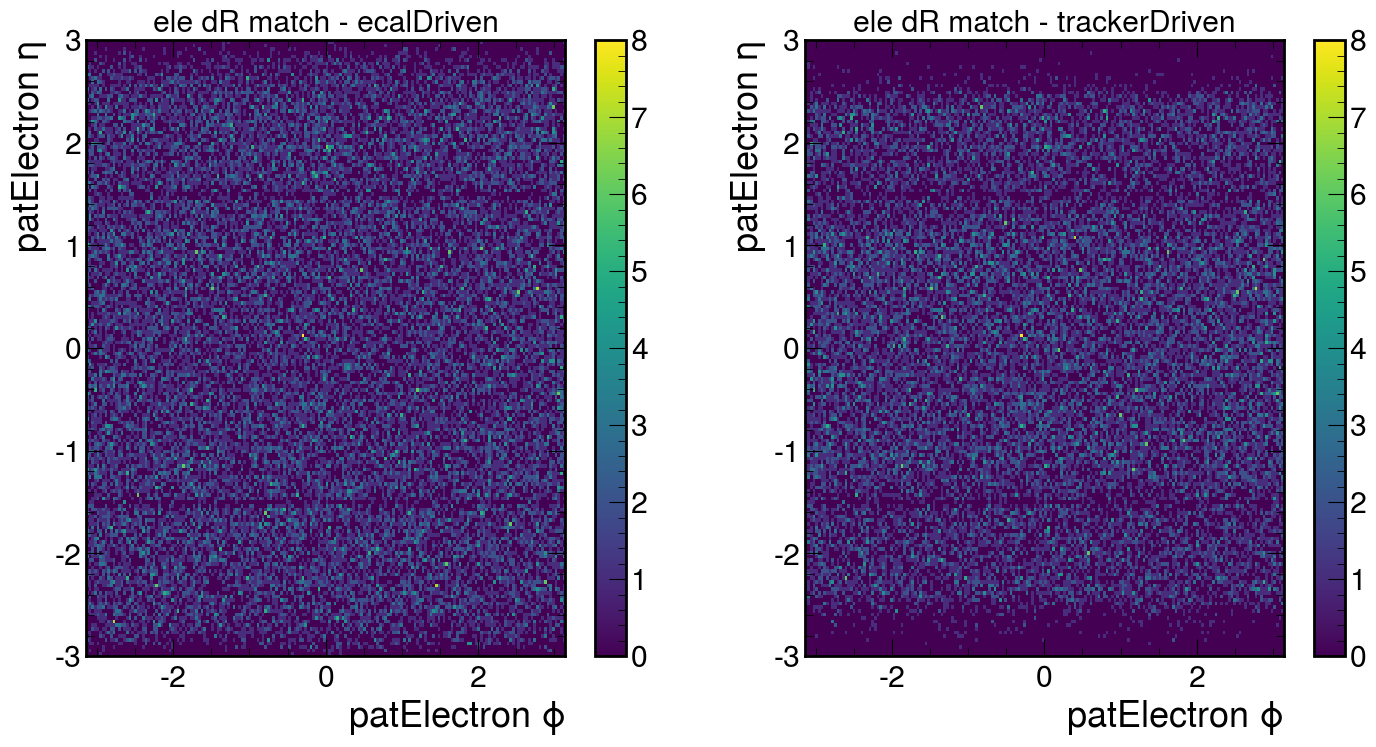

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

ecalDriven = dfD.gsfElectron_isEcalDriven

*b, C = ax1.hist2d(ak.to_numpy(ak.flatten(dfD.gsfElectron_phi[ecalDriven])),
                   ak.to_numpy(ak.flatten(dfD.gsfElectron_eta[ecalDriven])), bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("patElectron $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("ele dR match - ecalDriven", fontsize="small")



trackerDriven = dfD.gsfElectron_isTrackerDriven

*b, C = ax2.hist2d(ak.to_numpy(ak.flatten(dfD.gsfElectron_phi[trackerDriven])),
                   ak.to_numpy(ak.flatten(dfD.gsfElectron_eta[trackerDriven])), bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("patElectron $\eta$")
plt.colorbar(C, ax=ax2)
ax2.set_title("ele dR match - trackerDriven", fontsize="small")


Text(0.5, 1.0, 'ele dR match - ecalDriven')

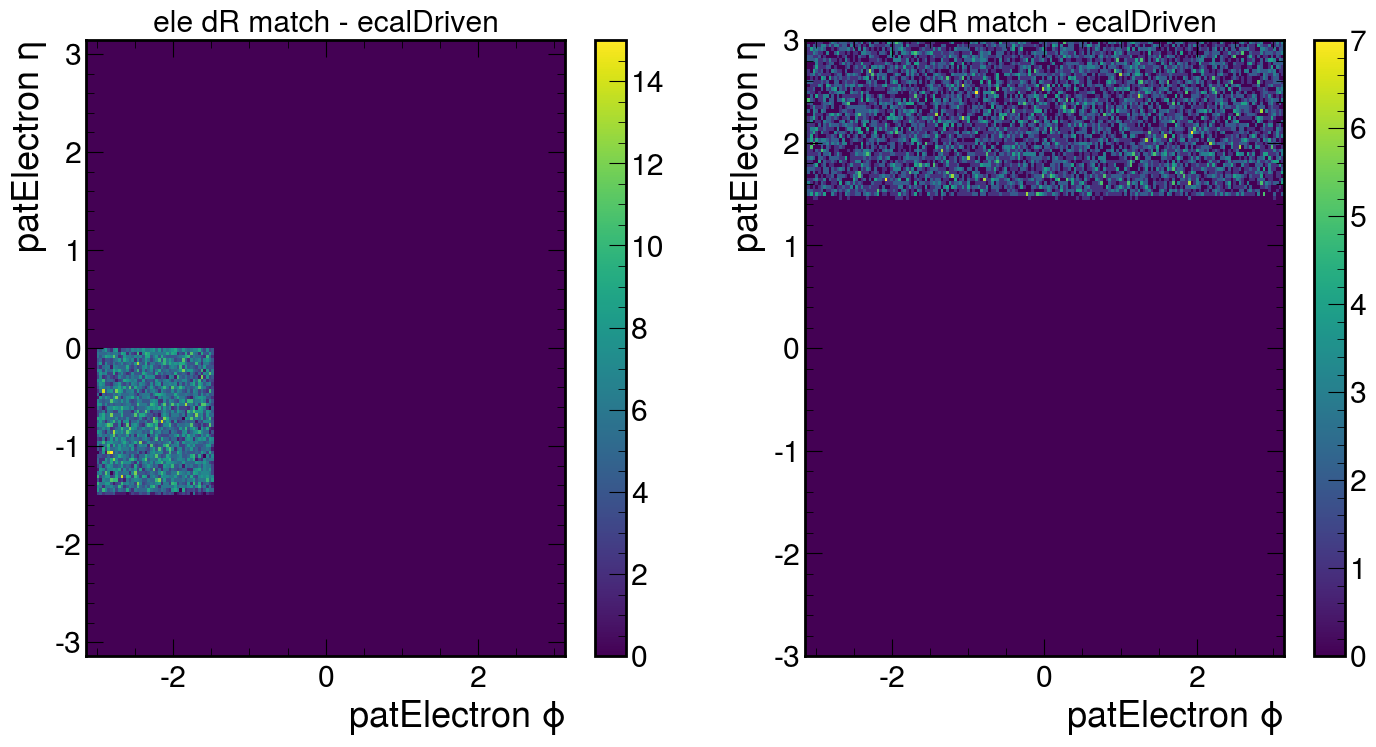

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))


*b, C = ax1.hist2d(ak.to_numpy(dfD.genParticle_eta[:,0]),
                   ak.to_numpy(dfD.genParticle_eta[:,1]), bins=(180,180), range=((-np.pi, np.pi), (-np.pi, np.pi)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("patElectron $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("ele dR match - ecalDriven", fontsize="small")


*b, C = ax2.hist2d(ak.to_numpy(dfD.genParticle_phi[:,3]),
                   ak.to_numpy(dfD.genParticle_eta[:,3]), bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("patElectron $\eta$")
plt.colorbar(C, ax=ax2)
ax2.set_title("ele dR match - ecalDriven", fontsize="small")


In [53]:
dfD.gsfElectron_ecalDrivenSeed

<Array [[1, 1, 1], [1, 0, ... [1, 0], [1]] type='33300 * var * float32'>

In [ ]:
ecalDriven = dfD.patElectron_isEcalDriven

*b, C = ax1.hist2d(ak.to_numpy(ak.flatten(dfD.patElectron_phi[ecalDriven])),
                   ak.to_numpy(ak.flatten(dfD.patElectron_eta[ecalDriven])), bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("ele dR match - ecalDriven", fontsize="small")


Text(0.5, 1.0, 'gsfElectron inclusive')

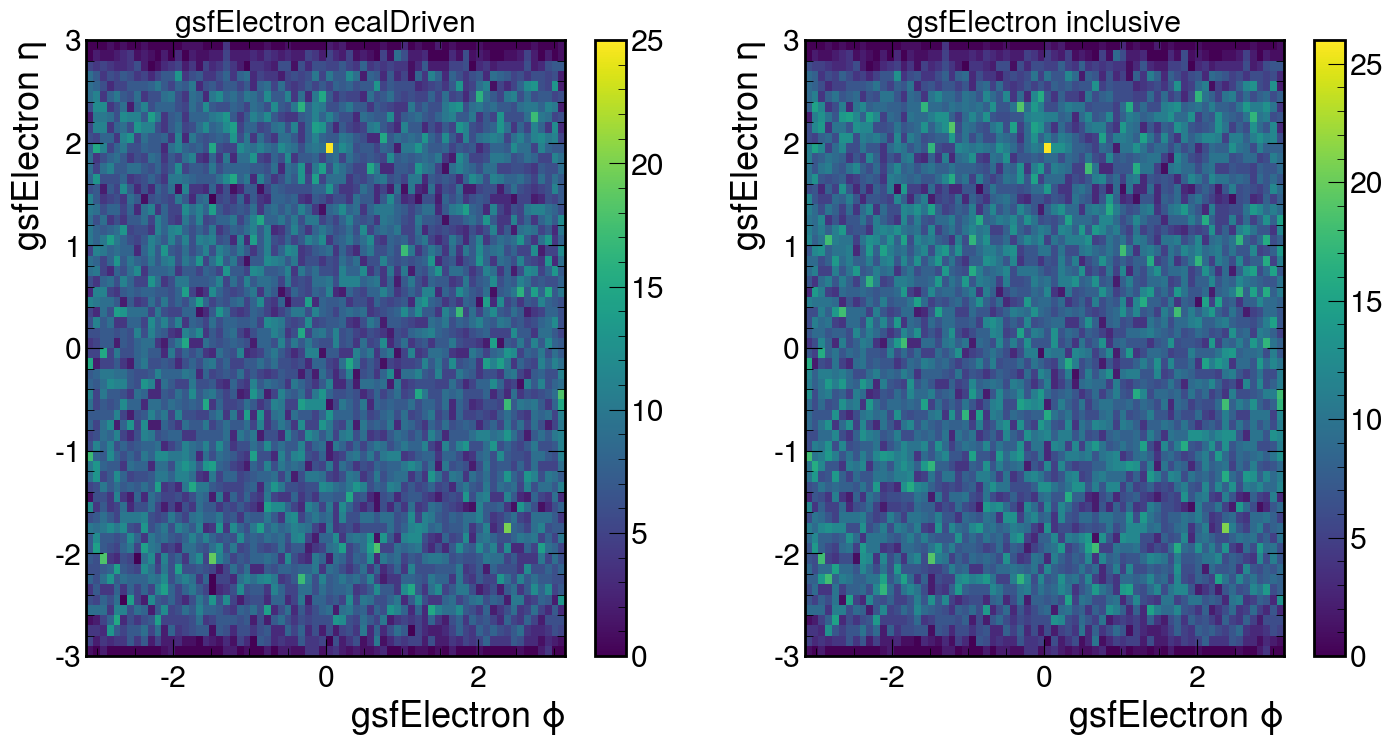

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

ecalDriven = dfD.gsfElectron_isEcalDriven

*b, C = ax1.hist2d(ak.to_numpy(ak.flatten(dfD.gsfElectron_phi[ecalDriven])),
                   ak.to_numpy(ak.flatten(dfD.gsfElectron_eta[ecalDriven])), bins=(70,60), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("gsfElectron $\phi$")
ax1.set_ylabel("gsfElectron $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("gsfElectron ecalDriven", fontsize="small")



*b, C = ax2.hist2d(ak.to_numpy(ak.flatten(dfD.gsfElectron_phi)),
                   ak.to_numpy(ak.flatten(dfD.gsfElectron_eta)), bins=(70,60), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("gsfElectron $\phi$")
ax2.set_ylabel("gsfElectron $\eta$")
plt.colorbar(C, ax=ax2)
ax2.set_title("gsfElectron inclusive", fontsize="small")


Text(0.5, 1.0, 'patElectron inclusive')

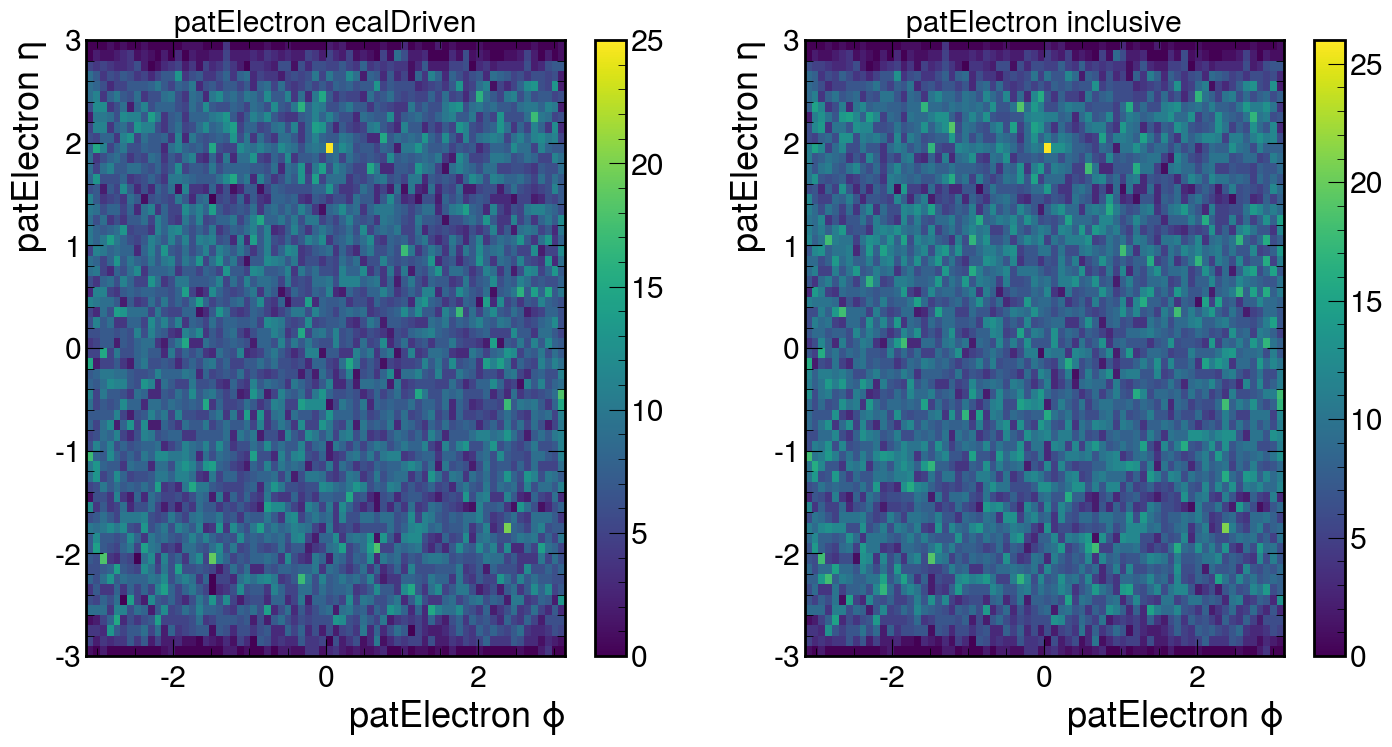

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

ecalDriven = dfD.patElectron_isEcalDriven

*b, C = ax1.hist2d(ak.to_numpy(ak.flatten(dfD.patElectron_phi[ecalDriven])),
                   ak.to_numpy(ak.flatten(dfD.patElectron_eta[ecalDriven])), bins=(70,60), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("patElectron $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("patElectron ecalDriven", fontsize="small")



*b, C = ax2.hist2d(ak.to_numpy(ak.flatten(dfD.patElectron_phi)),
                   ak.to_numpy(ak.flatten(dfD.patElectron_eta)), bins=(70,60), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("patElectron $\eta$")
plt.colorbar(C, ax=ax2)
ax2.set_title("patElectron inclusive", fontsize="small")


In [62]:
plt.hist(dfD.gsfElectron_dxy, bins=100)

AttributeError: no field named 'gsfElectron_dxy'

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.4/src/awkward/highlevel.py#L1124)

In [64]:
ak.sum(ak.num(dfD.gsfElectron_eta))

123105

In [65]:
ak.sum(ak.num(dfD.patElectron_eta))

123105

In [ ]:
plt.hist(dfD.gsfElectron_[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-1.)&(dfele.ele_phi<0)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>0.5)&(dfele.ele_phi<1.5)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
plt.hist(dfele[(dfele.ele_eta.abs()<1.5)&(dfele.ele_phi>-2.5)&(dfele.ele_phi<-1.5)].ele_dxy, bins=100, range=(-0.2, 0.2), histtype="step");
